In [1]:
!pip install simpleitk
# 安装 MONAI 和其他可能缺少的依赖项
!pip install monai
!pip install pytorch-lightning
!pip install albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [2]:
# 在文件顶部导入后添加以下代码 - 挂载Google Drive
import os
import sys
import glob
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import SimpleITK as sitk

# 添加Google Drive挂载代码
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive 已挂载")

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torch.amp import autocast, GradScaler

# 数据目录设置 - 确认路径正确性
data_base_dir = '/content/drive/MyDrive/ct_segmentation/data'
train_images_dir = os.path.join(data_base_dir, 'PENGWIN_CT_train_images')
train_labels_dir = os.path.join(data_base_dir, 'PENGWIN_CT_train_labels')
output_dir = '/content/drive/MyDrive/ct_segmentation/DeeplabV3'

# 检查目录
print(f"数据基础目录: {data_base_dir}")
print(f"  - 存在: {os.path.exists(data_base_dir)}")

print(f"训练图像目录: {train_images_dir}")
print(f"  - 存在: {os.path.exists(train_images_dir)}")
if os.path.exists(train_images_dir):
    print(f"  - 包含 {len(os.listdir(train_images_dir))} 个图像文件")

print(f"训练标签目录: {train_labels_dir}")
print(f"  - 存在: {os.path.exists(train_labels_dir)}")
if os.path.exists(train_labels_dir):
    print(f"  - 包含 {len(os.listdir(train_labels_dir))} 个标签文件")

print(f"输出目录: {output_dir}")
print(f"  - 存在: {os.path.exists(output_dir)}")

Mounted at /content/drive
Google Drive 已挂载
数据基础目录: /content/drive/MyDrive/ct_segmentation/data
  - 存在: True
训练图像目录: /content/drive/MyDrive/ct_segmentation/data/PENGWIN_CT_train_images
  - 存在: True
  - 包含 100 个图像文件
训练标签目录: /content/drive/MyDrive/ct_segmentation/data/PENGWIN_CT_train_labels
  - 存在: True
  - 包含 100 个标签文件
输出目录: /content/drive/MyDrive/ct_segmentation/DeeplabV3
  - 存在: True


=== 3D医学图像数据集验证 ===

正在查找医学图像文件...
找到 100 个图像文件
找到 100 个掩码文件

检查图像-掩码匹配...
找到 100 个匹配的图像-掩码对

开始分析数据集样本...


分析样本:   0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-3-768452f4ec8e>:142: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:142: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:142: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:142: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:142: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:142: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:142: UserWarning: Glyph 20999 (\N{CJK UNIFIED IDEOGRAPH-5207}) missing from

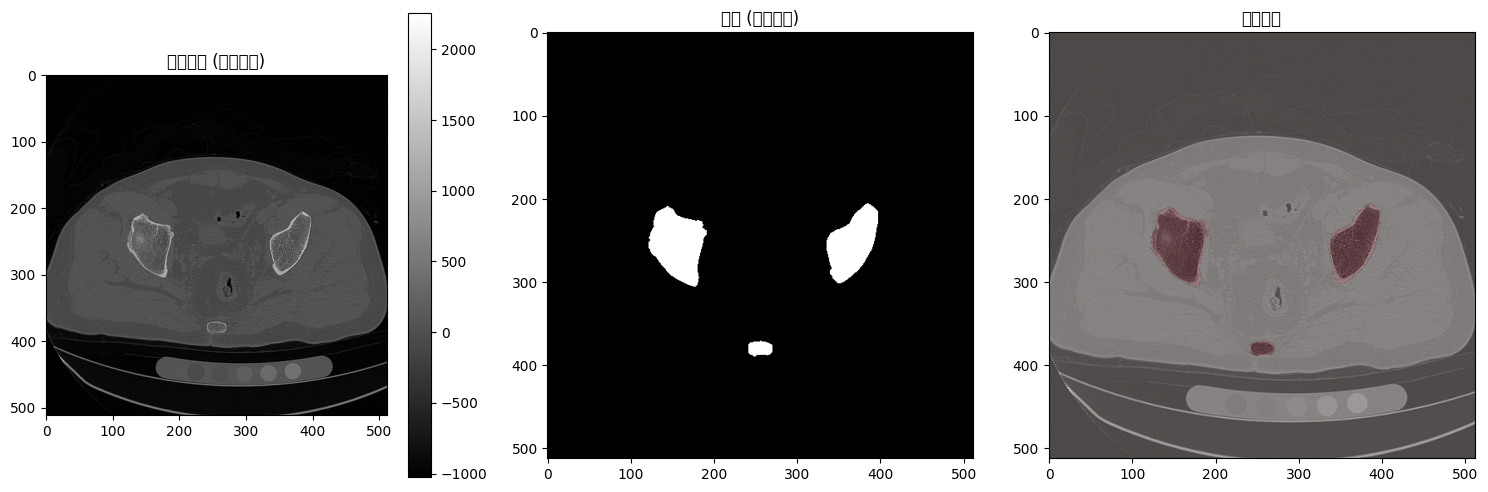

<ipython-input-3-768452f4ec8e>:182: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:182: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:182: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:182: UserWarning: Glyph 21472 (\N{CJK UNIFIED IDEOGRAPH-53E0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:182: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:182: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-768452f4ec8e>:182: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from

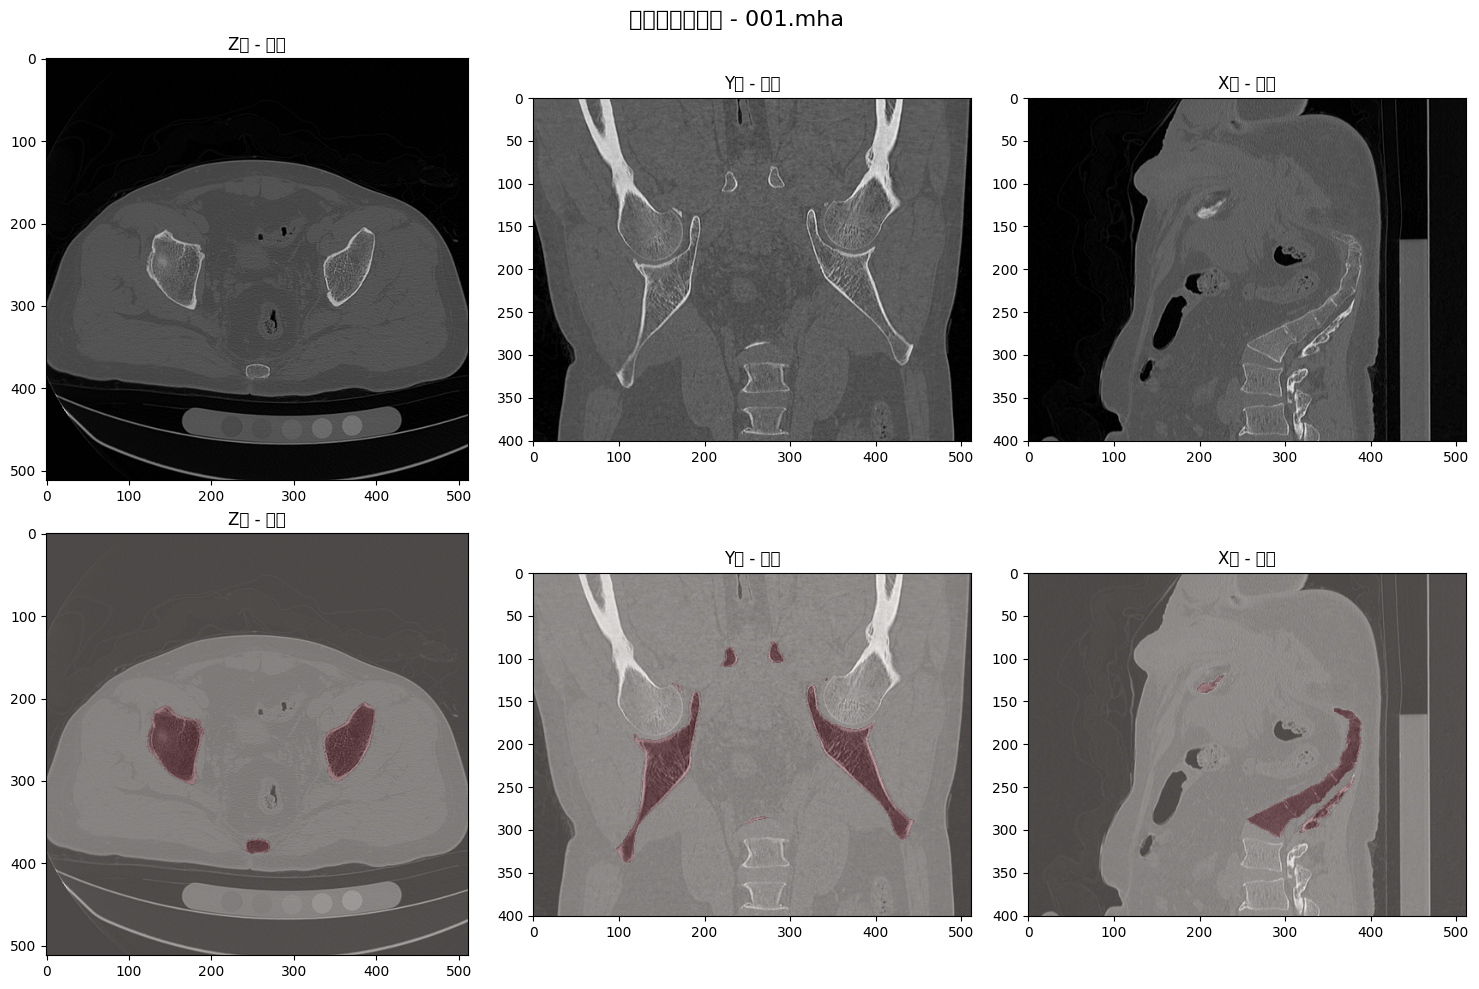


=== 数据集分析结果 ===
⚠ 发现 5 种不同的形状:
  - (312, 512, 512): 1 个样本
  - (285, 381, 512): 1 个样本
  - (401, 512, 512): 1 个样本
  - (337, 276, 413): 1 个样本
  - (224, 254, 386): 1 个样本

掩码中的唯一值: [0, 1, 2, 11, 12, 13, 14, 21, 22, 23]
⚠ 掩码不是二值图像，可能需要处理

前景/背景比例:
  平均前景比例: 0.0255 (2.55%)
  前景比例范围: 0.0098 - 0.0383

验证完成。
✓ 数据集看起来可以用于训练DeepLabV3。


In [3]:
# 3D医学图像数据集验证脚本 (.mha 格式)

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from tqdm.notebook import tqdm

# 基础数据目录
data_base_dir = '/content/drive/MyDrive/ct_segmentation/data'

# 训练图像和标签目录
train_images_dir = os.path.join(data_base_dir, 'PENGWIN_CT_train_images')
train_labels_dir = os.path.join(data_base_dir, 'PENGWIN_CT_train_labels')

def validate_3d_dataset(images_dir=train_images_dir, masks_dir=train_labels_dir, max_samples=5, show_slices=True):
    """验证3D医学图像数据集(.mha格式)"""

    print("=== 3D医学图像数据集验证 ===\n")

    # 验证目录是否存在
    if not os.path.exists(images_dir):
        print(f"错误: 图像目录不存在: {images_dir}")
        return None
    if not os.path.exists(masks_dir):
        print(f"错误: 掩码目录不存在: {masks_dir}")
        return None

    # 1. 检查目录和文件
    print("正在查找医学图像文件...")
    images = []
    for ext in ["*.mha", "*.nii.gz", "*.nii", "*.nrrd"]:
        images.extend(glob.glob(os.path.join(images_dir, ext)))

    masks = []
    for ext in ["*.mha", "*.nii.gz", "*.nii", "*.nrrd"]:
        masks.extend(glob.glob(os.path.join(masks_dir, ext)))

    images = sorted(images)
    masks = sorted(masks)

    print(f"找到 {len(images)} 个图像文件")
    print(f"找到 {len(masks)} 个掩码文件")

    if len(images) == 0 or len(masks) == 0:
        print("错误: 未找到足够的医学图像文件!")
        return None

    # 2. 查找匹配对
    print("\n检查图像-掩码匹配...")
    pairs = []
    for img_path in images:
        img_name = os.path.splitext(os.path.basename(img_path))[0]
        # 处理多重扩展名 (.nii.gz)
        if img_name.endswith('.nii'):
            img_name = os.path.splitext(img_name)[0]

        for mask_path in masks:
            mask_name = os.path.splitext(os.path.basename(mask_path))[0]
            # 处理多重扩展名 (.nii.gz)
            if mask_name.endswith('.nii'):
                mask_name = os.path.splitext(mask_name)[0]

            if img_name == mask_name:
                pairs.append((img_path, mask_path))
                break

    print(f"找到 {len(pairs)} 个匹配的图像-掩码对")

    if len(pairs) == 0:
        print("错误: 没有匹配的图像-掩码对!")
        return None

    # 3. 分析数据集
    print("\n开始分析数据集样本...")

    # 限制样本数量
    sample_pairs = pairs[:min(max_samples, len(pairs))]

    results = []
    shapes = []
    fg_ratios = []
    mask_values = set()

    for i, (img_path, mask_path) in enumerate(tqdm(sample_pairs, desc="分析样本")):
        try:
            # 读取图像和掩码
            img_sitk = sitk.ReadImage(img_path)
            mask_sitk = sitk.ReadImage(mask_path)

            img = sitk.GetArrayFromImage(img_sitk)
            mask = sitk.GetArrayFromImage(mask_sitk)

            # 检查形状
            if img.shape != mask.shape:
                print(f"警告: 样本 {i+1} 的图像和掩码形状不匹配!")
                print(f"  图像: {img.shape}, 掩码: {mask.shape}")

            # 收集统计信息
            shapes.append(img.shape)

            # 检查掩码值
            unique_values = np.unique(mask)
            mask_values.update(unique_values)

            # 计算前景比例
            mask_binary = mask > 0
            fg_ratio = np.mean(mask_binary)
            fg_ratios.append(fg_ratio)

            # 添加结果
            results.append({
                'path': img_path,
                'shape': img.shape,
                'foreground_ratio': fg_ratio,
                'unique_mask_values': unique_values,
                'img_range': [float(img.min()), float(img.max())],
                'mask_range': [float(mask.min()), float(mask.max())]
            })

            # 显示切片
            if show_slices and i == 0:  # 只显示第一个样本
                mid_slice = img.shape[0] // 2

                plt.figure(figsize=(15, 5))

                plt.subplot(131)
                plt.imshow(img[mid_slice], cmap='gray')
                plt.title('原始图像 (中间切片)')
                plt.colorbar()

                plt.subplot(132)
                plt.imshow(mask_binary[mid_slice], cmap='gray')
                plt.title('掩码 (中间切片)')

                plt.subplot(133)
                plt.imshow(img[mid_slice], cmap='gray')
                plt.imshow(mask_binary[mid_slice], alpha=0.3, cmap='Reds')
                plt.title('叠加显示')

                plt.tight_layout()
                plt.show()

                # 显示三个轴向的切片
                # 沿三个轴的中间切片
                plt.figure(figsize=(15, 10))
                plt.suptitle(f"三个轴向的切片 - {os.path.basename(img_path)}", fontsize=16)

                # 沿z轴 (轴0)
                plt.subplot(231)
                plt.imshow(img[mid_slice], cmap='gray')
                plt.title('Z轴 - 图像')

                plt.subplot(234)
                plt.imshow(img[mid_slice], cmap='gray')
                plt.imshow(mask_binary[mid_slice], alpha=0.3, cmap='Reds')
                plt.title('Z轴 - 叠加')

                # 沿y轴 (轴1)
                mid_y = img.shape[1] // 2
                plt.subplot(232)
                plt.imshow(img[:, mid_y, :], cmap='gray')
                plt.title('Y轴 - 图像')

                plt.subplot(235)
                plt.imshow(img[:, mid_y, :], cmap='gray')
                plt.imshow(mask_binary[:, mid_y, :], alpha=0.3, cmap='Reds')
                plt.title('Y轴 - 叠加')

                # 沿x轴 (轴2)
                mid_x = img.shape[2] // 2
                plt.subplot(233)
                plt.imshow(img[:, :, mid_x], cmap='gray')
                plt.title('X轴 - 图像')

                plt.subplot(236)
                plt.imshow(img[:, :, mid_x], cmap='gray')
                plt.imshow(mask_binary[:, :, mid_x], alpha=0.3, cmap='Reds')
                plt.title('X轴 - 叠加')

                plt.tight_layout()
                plt.show()

        except Exception as e:
            print(f"错误: 处理样本 {i+1} 时出错: {str(e)}")

    # 4. 显示数据集分析结果
    print("\n=== 数据集分析结果 ===")

    # 检查形状一致性
    unique_shapes = list(set(tuple(s) for s in shapes))
    if len(unique_shapes) == 1:
        print(f"✓ 所有样本形状一致: {unique_shapes[0]}")
    else:
        print(f"⚠ 发现 {len(unique_shapes)} 种不同的形状:")
        for shape in unique_shapes:
            count = sum(1 for s in shapes if s == shape)
            print(f"  - {shape}: {count} 个样本")

    # 检查掩码值
    print(f"\n掩码中的唯一值: {sorted(mask_values)}")
    if len(mask_values) <= 2 and 0 in mask_values:
        print("✓ 掩码为二值图像，适合分割任务")
    else:
        print("⚠ 掩码不是二值图像，可能需要处理")

    # 前景比例
    if fg_ratios:
        print("\n前景/背景比例:")
        print(f"  平均前景比例: {np.mean(fg_ratios):.4f} ({np.mean(fg_ratios)*100:.2f}%)")
        print(f"  前景比例范围: {min(fg_ratios):.4f} - {max(fg_ratios):.4f}")

        # 如果前景比例极低或极高，发出警告
        if np.mean(fg_ratios) < 0.01:
            print("⚠ 警告: 前景比例非常低，可能导致训练困难")
        elif np.mean(fg_ratios) > 0.9:
            print("⚠ 警告: 前景比例非常高，背景样本可能不足")

    print("\n验证完成。")

    if results:
        print("✓ 数据集看起来可以用于训练DeepLabV3。")

    return results

# 执行验证
results = validate_3d_dataset()

In [4]:
# 检查并安装必要的库
import sys
import subprocess

# 安装必要的包
def install_packages():
    print("正在检查并安装必要的包...")
    required_packages = ['pytorch-lightning']

    for package in required_packages:
        try:
            __import__(package.replace('-', '_'))
            print(f"  - {package} 已安装")
        except ImportError:
            print(f"  - 正在安装 {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"  - {package} 安装完成")

# 在导入之前安装
install_packages()

# 优化版本的DeepLabV3实现

# 标准导入
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import SimpleITK as sitk

# PyTorch导入
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.models as models

# PyTorch Lightning导入
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger

# 数据目录设置
data_base_dir = '/content/drive/MyDrive/ct_segmentation/data'
train_images_dir = os.path.join(data_base_dir, 'PENGWIN_CT_train_images')
train_labels_dir = os.path.join(data_base_dir, 'PENGWIN_CT_train_labels')
output_dir = '/content/drive/MyDrive/ct_segmentation/DeeplabV3'

# 若输出目录不存在则创建
os.makedirs(output_dir, exist_ok=True)

# 激进配置，充分利用40GB显存
config = {
    'seed': 42,
    'image_size': (384, 384),  # 大幅增加图像尺寸以提高分割精度
    'batch_size': 128,         # 极大增加批量大小利用显存
    'val_ratio': 0.2,
    'max_epochs': 50,         # 减少总训练轮次但增加每轮数据量
    'learning_rate': 5e-4,     # 增大学习率
    'weight_decay': 1e-5,      # 添加权重衰减
    'num_classes': 24,         # 会根据数据自动调整
    'use_mobilenet': False,    # 使用完整版本而非移动版本
    'precision': 16,           # 使用混合精度以进一步提高内存效率
    'log_dir': output_dir,
    'checkpoint_dir': output_dir,
    'enable_checkpointing': True,
    'slice_step': 4,           # 最激进设置：获取所有切片
    'limit_train_batches': 1.0, # 使用所有训练数据
    'limit_val_batches': 0.3,   # 使用所有验证数据
    'advanced_augmentation': True, # 启用高级数据增强
}

# 修改设置随机种子函数
def set_seed(seed=42):
    """设置随机种子确保可复现性，但允许某些非确定性操作"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.benchmark = True
        torch.backends.cudnn.deterministic = False

# CT切片数据集类
class CTSliceDataset(Dataset):
    """3D CT切片数据集"""
    def __init__(self, image_files, label_files, resize_to=None):
        self.image_files = image_files
        self.label_files = label_files
        self.resize_to = resize_to
        self.slice_indices = self._prepare_slices()

    def _prepare_slices(self):
        """准备切片索引，优化采样策略"""
        indices = []
        print("准备切片索引...")
        for i, (img_file, lbl_file) in enumerate(tqdm(zip(self.image_files, self.label_files))):
            try:
                # 读取数据
                img_sitk = sitk.ReadImage(img_file)
                lbl_sitk = sitk.ReadImage(lbl_file)

                img_array = sitk.GetArrayFromImage(img_sitk)
                lbl_array = sitk.GetArrayFromImage(lbl_sitk)

                # 增加切片步长到8-10，大幅减少数据量
                step = 6

                # 智能采样：找出含有标签的切片
                non_empty_mask = np.max(lbl_array, axis=(1,2)) > 0
                non_empty_slices = np.where(non_empty_mask)[0]

                # 采样非空切片
                sampled_indices = non_empty_slices[::step]

                # 在空白区域也采样少量切片
                empty_slices = np.where(~non_empty_mask)[0]
                if len(empty_slices) > 0:
                    empty_samples = empty_slices[::step*4]  # 空白区域步长更大

                    # 合并非空和空白采样
                    all_samples = np.concatenate([sampled_indices, empty_samples])
                    all_samples.sort()
                else:
                    all_samples = sampled_indices

                # 添加切片
                for slice_idx in all_samples:
                    indices.append({'vol_idx': i, 'slice_idx': int(slice_idx)})

            except Exception as e:
                print(f"准备切片 {img_file} 时出错: {e}")

        print(f"总共准备了 {len(indices)} 个2D切片")
        return indices

    def __len__(self):
        return len(self.slice_indices)

    def __getitem__(self, idx):
        try:
            # 获取切片信息
            slice_info = self.slice_indices[idx]
            vol_idx = slice_info['vol_idx']
            slice_idx = slice_info['slice_idx']

            # 读取图像和标签
            img_sitk = sitk.ReadImage(self.image_files[vol_idx])
            lbl_sitk = sitk.ReadImage(self.label_files[vol_idx])

            img_array = sitk.GetArrayFromImage(img_sitk)
            lbl_array = sitk.GetArrayFromImage(lbl_sitk)

            # 获取单个切片
            image = img_array[slice_idx].astype(np.float32)
            label = lbl_array[slice_idx].astype(np.int64)

            # 标准化图像 - 使用健壮的方法
            if np.max(image) - np.min(image) > 0:
                image = (image - np.min(image)) / (np.max(image) - np.min(image))

            # 转换为张量
            image = torch.from_numpy(image).unsqueeze(0)  # [1, H, W]
            label = torch.from_numpy(label)  # [H, W]

            # 调整大小
            if self.resize_to:
                image = F.interpolate(
                    image.unsqueeze(0),
                    size=self.resize_to,
                    mode='bilinear'
                ).squeeze(0)

                label = F.interpolate(
                    label.unsqueeze(0).unsqueeze(0).float(),
                    size=self.resize_to,
                    mode='nearest'
                ).squeeze(0).squeeze(0).long()

            # 确保标签在有效范围内
            if torch.max(label) >= config['num_classes']:
                label = torch.clamp(label, 0, config['num_classes']-1)

            return image, label
        except Exception as e:
            print(f"加载样本 {idx} 出错: {e}")
            # 返回零填充的样本
            dummy_shape = self.resize_to if self.resize_to else (128, 128)
            return torch.zeros((1, *dummy_shape)), torch.zeros(dummy_shape, dtype=torch.long)

# PyTorch Lightning数据模块
class CTDataModule(pl.LightningDataModule):
    """CT数据模块"""
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.train_dataset = None
        self.val_dataset = None
        print("数据模块初始化完成")

    def prepare_data(self):
        """检查数据目录"""
        print("检查数据目录:")

        print(f"图像目录: {train_images_dir}")
        print(f"  - 存在: {os.path.exists(train_images_dir)}")

        # 计算文件数量
        if os.path.exists(train_images_dir):
            mha_files = glob.glob(os.path.join(train_images_dir, "*.mha"))
            print(f"  - 找到 {len(mha_files)} 个.mha文件")

        print(f"标签目录: {train_labels_dir}")
        print(f"  - 存在: {os.path.exists(train_labels_dir)}")

        # 计算文件数量
        if os.path.exists(train_labels_dir):
            mha_files = glob.glob(os.path.join(train_labels_dir, "*.mha"))
            print(f"  - 找到 {len(mha_files)} 个.mha文件")

    def setup(self, stage=None):
        print("开始设置数据模块...")
        # 如果已经设置过，则跳过
        if self.train_dataset is not None and self.val_dataset is not None:
            return

        # 查找所有.mha文件
        image_pattern = os.path.join(train_images_dir, "*.mha")
        label_pattern = os.path.join(train_labels_dir, "*.mha")

        image_files = sorted(glob.glob(image_pattern))
        label_files = sorted(glob.glob(label_pattern))

        print(f"使用扩展名 *.mha 找到 {len(image_files)} 个图像文件")
        if len(image_files) > 0:
            print(f"图像文件示例: {image_files[0]}")

        print(f"使用扩展名 *.mha 找到 {len(label_files)} 个标签文件")
        if len(label_files) > 0:
            print(f"标签文件示例: {label_files[0]}")

        # 划分训练集和验证集
        n_val = int(len(image_files) * self.config['val_ratio'])
        n_train = len(image_files) - n_val

        # 随机排列索引
        indices = list(range(len(image_files)))
        random.shuffle(indices)

        train_indices = indices[:n_train]
        val_indices = indices[n_train:]

        train_image_files = [image_files[i] for i in train_indices]
        train_label_files = [label_files[i] for i in train_indices]

        val_image_files = [image_files[i] for i in val_indices]
        val_label_files = [label_files[i] for i in val_indices]

        print("划分数据集完成:")
        print(f"  - 训练集: {len(train_image_files)} 样本")
        print(f"  - 验证集: {len(val_label_files)} 样本")

        # 查看样本信息
        if len(image_files) > 0 and len(label_files) > 0:
            try:
                sample_img = sitk.ReadImage(image_files[0])
                sample_lbl = sitk.ReadImage(label_files[0])

                img_array = sitk.GetArrayFromImage(sample_img)
                lbl_array = sitk.GetArrayFromImage(sample_lbl)

                print(f"示例图像尺寸: {img_array.shape}, 示例标签尺寸: {lbl_array.shape}")
                print(f"图像数据类型: {img_array.dtype}, 标签数据类型: {lbl_array.dtype}")
                print(f"图像值范围: [{np.min(img_array)}, {np.max(img_array)}], 标签值范围: [{np.min(lbl_array)}, {np.max(lbl_array)}]")
            except Exception as e:
                print(f"查看样本信息时出错: {e}")

        # 创建数据集
        self.train_dataset = CTSliceDataset(
            train_image_files,
            train_label_files,
            resize_to=self.config['image_size']
        )

        self.val_dataset = CTSliceDataset(
            val_image_files,
            val_label_files,
            resize_to=self.config['image_size']
        )

        print(f"训练集大小: {len(self.train_dataset)}")
        print(f"验证集大小: {len(self.val_dataset)}")

        # 创建数据集后，检测实际类别数并更新配置
        if len(self.train_dataset) > 0:
            actual_num_classes = self._check_label_range()
            self.config['detected_num_classes'] = actual_num_classes

        print("数据模块设置完成")

    def _check_label_range(self):
        """检查标签值的实际范围"""
        print("检查实际标签类别...")
        max_class = 0
        unique_values = set()

        # 采样少量数据点检查标签范围
        num_samples = min(len(self.train_dataset), 100)
        step = max(1, len(self.train_dataset) // num_samples)

        for i in range(0, len(self.train_dataset), step):
            try:
                _, label = self.train_dataset[i]
                # 更新最大类别ID
                current_max = int(label.max().item())
                if current_max > max_class:
                    max_class = current_max
                    print(f"  在样本 {i} 中发现新的最大类别ID: {max_class}")

                # 收集所有唯一值
                unique_vals = torch.unique(label).cpu().numpy().tolist()
                unique_values.update(unique_vals)
            except Exception as e:
                print(f"  检查样本 {i} 时出错: {e}")

        print(f"数据集中发现的不同标签值: {sorted(list(unique_values))}")
        print(f"最大标签值: {max_class}")

        # 类别数等于最大标签值+1（因为标签从0开始）
        num_classes = max_class + 1
        print(f"检测到的类别数: {num_classes}")

        return num_classes

    def train_dataloader(self):
        print("创建训练数据加载器...")
        loader = DataLoader(
            self.train_dataset,
            batch_size=self.config['batch_size'],
            shuffle=True,
            num_workers=0,  # 使用0个工作进程避免并行处理问题
            pin_memory=False  # 禁用pin_memory以降低内存压力
        )
        print(f"训练批数: {len(loader)}")
        return loader

    def val_dataloader(self):
        print("创建验证数据加载器...")
        loader = DataLoader(
            self.val_dataset,
            batch_size=self.config['batch_size'],
            shuffle=False,
            num_workers=0,
            pin_memory=False
        )
        print(f"验证批数: {len(loader)}")
        return loader

    def setup_augmentations(self):
        """设置更复杂的数据增强管道"""
        if not self.config.get('advanced_augmentation', False):
            return

        try:
            import albumentations as A
            from albumentations.pytorch import ToTensorV2

            # 高级增强管道
            self.train_transforms = A.Compose([
                # 空间变换
                A.RandomRotate90(p=0.5),
                A.HorizontalFlip(p=0.5),
                A.VerticalFlip(p=0.5),
                A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, p=0.5),

                # 强度变换
                A.RandomBrightnessContrast(p=0.5),
                A.OneOf([
                    A.GaussNoise(p=1),
                    A.GaussianBlur(p=1),
                    A.MedianBlur(blur_limit=3, p=1),
                ], p=0.3),

                # 弹性变换
                A.OneOf([
                    A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, p=1),
                    A.GridDistortion(p=1),
                    A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
                ], p=0.3),

                # 最终格式转换
                A.Normalize(mean=0.0, std=1.0),
                ToTensorV2(),
            ])

            # 验证集不需要数据增强
            self.val_transforms = A.Compose([
                A.Normalize(mean=0.0, std=1.0),
                ToTensorV2(),
            ])

            print("已设置高级数据增强")
        except ImportError:
            print("警告: albumentations库不可用，不使用高级数据增强")
            self.train_transforms = None
            self.val_transforms = None

# 采用简化版DeepLabV3架构，不使用MobileNetV3

# 自定义残差块作为骨干网络基础单元
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # 如果输入输出维度不同，添加1x1卷积进行调整
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# 简化版DeepLabV3骨干网络
class SimpleBackbone(nn.Module):
    def __init__(self, in_channels=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, 64, 7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(3, stride=2, padding=1)

        # 创建4个残差层
        self.layer1 = self._make_layer(64, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)

    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        return x

# ASPP模块 (Atrous Spatial Pyramid Pooling)
class ASPP(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        # 不同膨胀率的空洞卷积
        self.conv1 = nn.Conv2d(in_channels, out_channels, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(in_channels, out_channels, 3, padding=6, dilation=6, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(in_channels, out_channels, 3, padding=12, dilation=12, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)

        self.conv4 = nn.Conv2d(in_channels, out_channels, 3, padding=18, dilation=18, bias=False)
        self.bn4 = nn.BatchNorm2d(out_channels)

        # 全局平均池化分支
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.conv5 = nn.Conv2d(in_channels, out_channels, 1, bias=False)
        self.bn5 = nn.BatchNorm2d(out_channels)

        # 输出卷积
        self.conv_out = nn.Conv2d(out_channels * 5, out_channels, 1, bias=False)
        self.bn_out = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        size = x.size()[2:]

        # 并行处理各分支
        conv1 = F.relu(self.bn1(self.conv1(x)))
        conv2 = F.relu(self.bn2(self.conv2(x)))
        conv3 = F.relu(self.bn3(self.conv3(x)))
        conv4 = F.relu(self.bn4(self.conv4(x)))

        # 全局池化分支
        pool = self.pool(x)
        pool = F.relu(self.bn5(self.conv5(pool)))
        pool = F.interpolate(pool, size=size, mode='bilinear', align_corners=False)

        # 合并所有分支
        out = torch.cat([conv1, conv2, conv3, conv4, pool], dim=1)
        out = F.relu(self.bn_out(self.conv_out(out)))

        return out

# 修复输入和目标尺寸不匹配问题
class SimpleDeepLabV3(nn.Module):
    def __init__(self, in_channels=1, num_classes=24):
        super().__init__()
        self.backbone = SimpleBackbone(in_channels)
        self.aspp = ASPP(512, 256)

        # 简单解码器
        self.decoder = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, num_classes, 1)
        )

        # 上采样到原始图像大小 (256x256)
        # 由于背景网络4次下采样 (总下采样因子=16)，所以需要16倍上采样
        self.upsample = nn.Upsample(scale_factor=16, mode='bilinear', align_corners=True)

    def forward(self, x):
        input_size = x.shape[-2:]  # 记录输入尺寸
        x = self.backbone(x)
        x = self.aspp(x)
        x = self.decoder(x)

        # 确保上采样到与输入完全相同的尺寸
        x = F.interpolate(x, size=input_size, mode='bilinear', align_corners=True)
        return x

class CTSegmentationModule(pl.LightningModule):
    """CT分割Lightning模块 - 使用SimpleDeepLabV3"""
    def __init__(self, config):
        super().__init__()
        self.save_hyperparameters()
        self.config = config

        # 使用简化版DeepLabV3
        self.model = SimpleDeepLabV3(in_channels=1, num_classes=config['num_classes'])

        # 使用交叉熵损失
        self.criterion = nn.CrossEntropyLoss(ignore_index=255)

        # 记录最大类别值，用于验证
        self.max_class = config['num_classes'] - 1

        print(f"DeepLabV3模型已初始化，类别数: {config['num_classes']}")

    def forward(self, x):
        return self.model(x)

    # 训练步骤
    def training_step(self, batch, batch_idx):
        x, y = batch

        # 记录输入和目标的尺寸，用于调试
        if batch_idx == 0:
            print(f"训练输入形状: {x.shape}, 目标形状: {y.shape}")

        y_hat = self(x)

        # 确保预测和目标形状匹配
        if y_hat.shape[-2:] != y.shape[-2:]:
            y_hat = F.interpolate(y_hat, size=y.shape[-2:], mode='bilinear', align_corners=True)
            print(f"调整预测形状: {y_hat.shape}")

        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch

        # 记录验证输入尺寸
        if batch_idx == 0:
            print(f"验证输入形状: {x.shape}, 目标形状: {y.shape}")

        y_hat = self(x)

        # 确保预测和目标形状匹配
        if y_hat.shape[-2:] != y.shape[-2:]:
            y_hat = F.interpolate(y_hat, size=y.shape[-2:], mode='bilinear', align_corners=True)

        loss = self.criterion(y_hat, y)
        self.log('val_loss', loss, on_epoch=True, prog_bar=True)

        # 计算准确率
        preds = torch.argmax(y_hat, dim=1)
        acc = (preds == y).float().mean()
        self.log('val_acc', acc, on_epoch=True, prog_bar=True)

        return {'val_loss': loss, 'val_acc': acc}

    def configure_optimizers(self):
        """配置优化器和学习率调度器"""
        # 创建优化器
        optimizer = torch.optim.Adam(
            self.parameters(),
            lr=self.config['learning_rate'],
            weight_decay=self.config['weight_decay']
        )

        # 创建学习率调度器
        scheduler = {
            'scheduler': torch.optim.lr_scheduler.ReduceLROnPlateau(
                optimizer,
                mode='min',
                factor=0.5,
                patience=2,
                min_lr=1e-6,
                verbose=True
            ),
            'monitor': 'train_loss',  # 使用训练损失作为指标
            'interval': 'epoch',
            'frequency': 1
        }

        return [optimizer], [scheduler]

# 可视化函数
def visualize_sample(data_module, n_samples=3):
    """可视化数据样本"""
    dataloader = data_module.train_dataloader()
    batch = next(iter(dataloader))
    images, labels = batch

    fig, axes = plt.subplots(n_samples, 2, figsize=(10, n_samples * 5))

    for i in range(n_samples):
        # 显示图像
        axes[i, 0].imshow(images[i, 0].cpu().numpy(), cmap='gray')
        axes[i, 0].set_title('输入图像')
        axes[i, 0].axis('off')

        # 显示标签
        axes[i, 1].imshow(labels[i].cpu().numpy())
        axes[i, 1].set_title('分割标签')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'sample_visualization.png'))
    plt.close()

# 主函数
def main():
    try:
        # 设置随机种子
        set_seed(config['seed'])

        # 创建数据模块并手动运行setup
        print("\n=== 准备数据模块 ===")
        data_module = CTDataModule(config)
        data_module.setup()
        print("数据模块准备完成")

        # 使用检测到的类别数更新配置
        if hasattr(data_module, 'config') and 'detected_num_classes' in data_module.config:
            detected_classes = data_module.config['detected_num_classes']
            config['num_classes'] = detected_classes
            print(f"=== 使用从数据集检测到的类别数: {detected_classes} ===")

        # 创建模型
        print("=== 初始化模型 ===")
        model = CTSegmentationModule(config)

        # 创建日志记录器和回调
        logger = TensorBoardLogger(save_dir=config['log_dir'])

        # 创建回调列表
        callbacks = []

        # 添加学习率监控器
        lr_monitor = LearningRateMonitor(logging_interval='step')
        callbacks.append(lr_monitor)

        # 检查是否启用检查点保存
        if config.get('enable_checkpointing', True):
            checkpoint_callback = ModelCheckpoint(
                monitor='val_loss',
                mode='min',
                save_top_k=1,
                save_last=True,
                dirpath=config['checkpoint_dir'],
                filename='{epoch:02d}-{val_loss:.2f}'
            )
            callbacks.append(checkpoint_callback)

        # 创建训练器
        print("\n=== 开始训练循环 ===")
        trainer = pl.Trainer(
            max_epochs=config['max_epochs'],
            accelerator='gpu' if torch.cuda.is_available() else 'cpu',
            devices=1,
            precision=config['precision'],
            logger=logger,
            callbacks=callbacks,
            log_every_n_steps=10,
            limit_train_batches=config['limit_train_batches'],
            limit_val_batches=config['limit_val_batches'],
            num_sanity_val_steps=2,
            enable_progress_bar=True,
            enable_model_summary=True,
            deterministic=False,  # 关闭确定性以提高性能
            enable_checkpointing=config['enable_checkpointing'],
            gradient_clip_val=1.0,  # 添加梯度裁剪以稳定训练
            accumulate_grad_batches=1,  # 不累积梯度
        )

        print("训练器已创建，开始训练...")
        trainer.fit(model, data_module)

        print("训练完成!")

        # 保存最终模型
        final_model_path = os.path.join(output_dir, 'final_model.pt')
        print(f"保存最终模型到 {final_model_path}")
        torch.save(model.state_dict(), final_model_path)

        print("模型已保存，处理完成。")

    except Exception as e:
        print(f"训练过程中出现错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

正在检查并安装必要的包...
  - pytorch-lightning 已安装

=== 准备数据模块 ===
数据模块初始化完成
开始设置数据模块...
使用扩展名 *.mha 找到 100 个图像文件
图像文件示例: /content/drive/MyDrive/ct_segmentation/data/PENGWIN_CT_train_images/001.mha
使用扩展名 *.mha 找到 100 个标签文件
标签文件示例: /content/drive/MyDrive/ct_segmentation/data/PENGWIN_CT_train_labels/001.mha
划分数据集完成:
  - 训练集: 80 样本
  - 验证集: 20 样本
示例图像尺寸: (401, 512, 512), 示例标签尺寸: (401, 512, 512)
图像数据类型: int32, 标签数据类型: int16
图像值范围: [-1023, 2775], 标签值范围: [0, 21]
准备切片索引...


0it [00:00, ?it/s]

总共准备了 3619 个2D切片
准备切片索引...


0it [00:00, ?it/s]

总共准备了 845 个2D切片
训练集大小: 3619
验证集大小: 845
检查实际标签类别...
  在样本 36 中发现新的最大类别ID: 12
  在样本 72 中发现新的最大类别ID: 23
数据集中发现的不同标签值: [0, 1, 2, 4, 11, 12, 13, 14, 15, 21, 22, 23]
最大标签值: 23
检测到的类别数: 24
数据模块设置完成
数据模块准备完成
=== 使用从数据集检测到的类别数: 24 ===
=== 初始化模型 ===


/usr/local/lib/python3.11/dist-packages/lightning_fabric/connector.py:572: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(limit_train_batches=1.0)` was configured so 100% of the batches per epoch will be used..
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/gene

DeepLabV3模型已初始化，类别数: 24

=== 开始训练循环 ===
训练器已创建，开始训练...
检查数据目录:
图像目录: /content/drive/MyDrive/ct_segmentation/data/PENGWIN_CT_train_images
  - 存在: True
  - 找到 100 个.mha文件
标签目录: /content/drive/MyDrive/ct_segmentation/data/PENGWIN_CT_train_labels
  - 存在: True
  - 找到 100 个.mha文件


/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/drive/MyDrive/ct_segmentation/DeeplabV3 exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


开始设置数据模块...


INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleDeepLabV3  | 15.9 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
15.9 M    Trainable params
0         Non-trainable params
15.9 M    Total params
63.594    Total estimated model params size (MB)
84        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


创建验证数据加载器...
验证批数: 7
验证输入形状: torch.Size([128, 1, 384, 384]), 目标形状: torch.Size([128, 384, 384])
创建训练数据加载器...
训练批数: 29


/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

训练输入形状: torch.Size([128, 1, 384, 384]), 目标形状: torch.Size([128, 384, 384])


Validation: |          | 0/? [00:00<?, ?it/s]

验证输入形状: torch.Size([128, 1, 384, 384]), 目标形状: torch.Size([128, 384, 384])
训练输入形状: torch.Size([128, 1, 384, 384]), 目标形状: torch.Size([128, 384, 384])


Validation: |          | 0/? [00:00<?, ?it/s]

验证输入形状: torch.Size([128, 1, 384, 384]), 目标形状: torch.Size([128, 384, 384])
训练输入形状: torch.Size([128, 1, 384, 384]), 目标形状: torch.Size([128, 384, 384])


INFO:pytorch_lightning.utilities.rank_zero:
Detected KeyboardInterrupt, attempting graceful shutdown ...


训练过程中出现错误: name 'exit' is not defined


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/call.py", line 47, in _call_and_handle_interrupt
    return trainer_fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/trainer.py", line 575, in _fit_impl
    self._run(model, ckpt_path=ckpt_path)
  File "/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/trainer.py", line 982, in _run
    results = self._run_stage()
              ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/trainer.py", line 1026, in _run_stage
    self.fit_loop.run()
  File "/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py", line 216, in run
    self.advance()
  File "/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py", line 455, in advance
    self.epoch_loop.run(self._data_fetcher)
  File "/usr/local/lib/python3.11/

检查模型文件是否存在: True

检查数据目录:
图像目录: /content/drive/MyDrive/ct_segmentation/data/PENGWIN_CT_train_images
  - 存在: True
  - 找到 100 个.mha文件
标签目录: /content/drive/MyDrive/ct_segmentation/data/PENGWIN_CT_train_labels
  - 存在: True
  - 找到 100 个.mha文件
加载模型: /content/drive/MyDrive/ct_segmentation/DeeplabV3/last-v1.ckpt
模型成功加载到设备: cuda
测试数据集大小: 6样本
开始评估...


100%|██████████| 6/6 [00:06<00:00,  1.13s/it]
<ipython-input-11-5e563249d201>:571: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5e563249d201>:571: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5e563249d201>:571: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5e563249d201>:571: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5e563249d201>:571: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5e563249d201>:571: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5e563249d201>:571: UserWarning: Glyp


模型评估结果 - /content/drive/MyDrive/ct_segmentation/DeeplabV3/last-v1.ckpt
准确率: 0.9673
平均Dice系数: 0.1064
平均IoU: 0.0584
精确率: 0.4201
召回率: 0.0624

各类别性能:
类别 1: Dice=0.0064, IoU=0.0033
类别 11: Dice=0.1187, IoU=0.0767

生成增强版可视化结果...


<ipython-input-11-5e563249d201>:572: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(eval_dir, f'enhanced_sample_{i+1}_result.png'),
<ipython-input-11-5e563249d201>:572: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(eval_dir, f'enhanced_sample_{i+1}_result.png'),
<ipython-input-11-5e563249d201>:572: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(eval_dir, f'enhanced_sample_{i+1}_result.png'),
<ipython-input-11-5e563249d201>:572: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(eval_dir, f'enhanced_sample_{i+1}_result.png'),
<ipython-input-11-5e563249d201>:601: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5e563249d201>:60

评估完成! 报告已保存到 /content/drive/MyDrive/ct_segmentation/DeeplabV3/evaluation

===== 创建多轴向可视化 =====
可视化样本数量: 6
尝试从文件加载3D体积: /content/drive/MyDrive/ct_segmentation/data/PENGWIN_CT_train_images/001.mha
对3D体积进行预测...
创建多轴向可视化: /content/drive/MyDrive/ct_segmentation/DeeplabV3/evaluation/multiaxis_sample_1.png
创建多轴向可视化时出错: name 'create_multiaxis_visualization' is not defined

===== 展示评估结果 =====

🔍 增强版样本分割结果:


Traceback (most recent call last):
  File "<ipython-input-11-5e563249d201>", line 725, in evaluate_model
    create_multiaxis_visualization(ct_volume, gt_volume, pred_volume, multiaxis_path, 1)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'create_multiaxis_visualization' is not defined


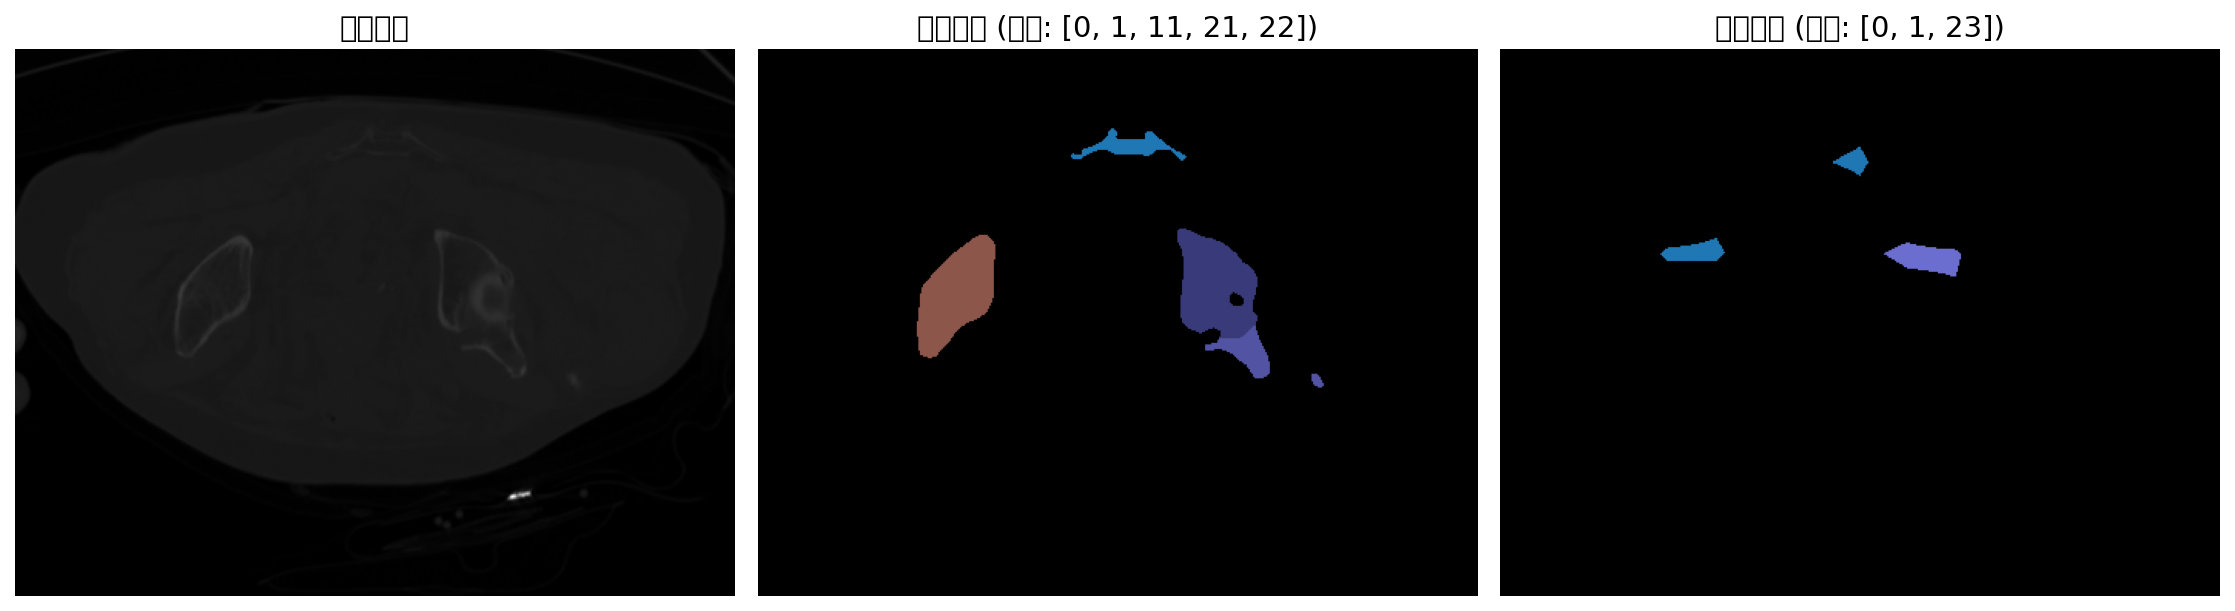

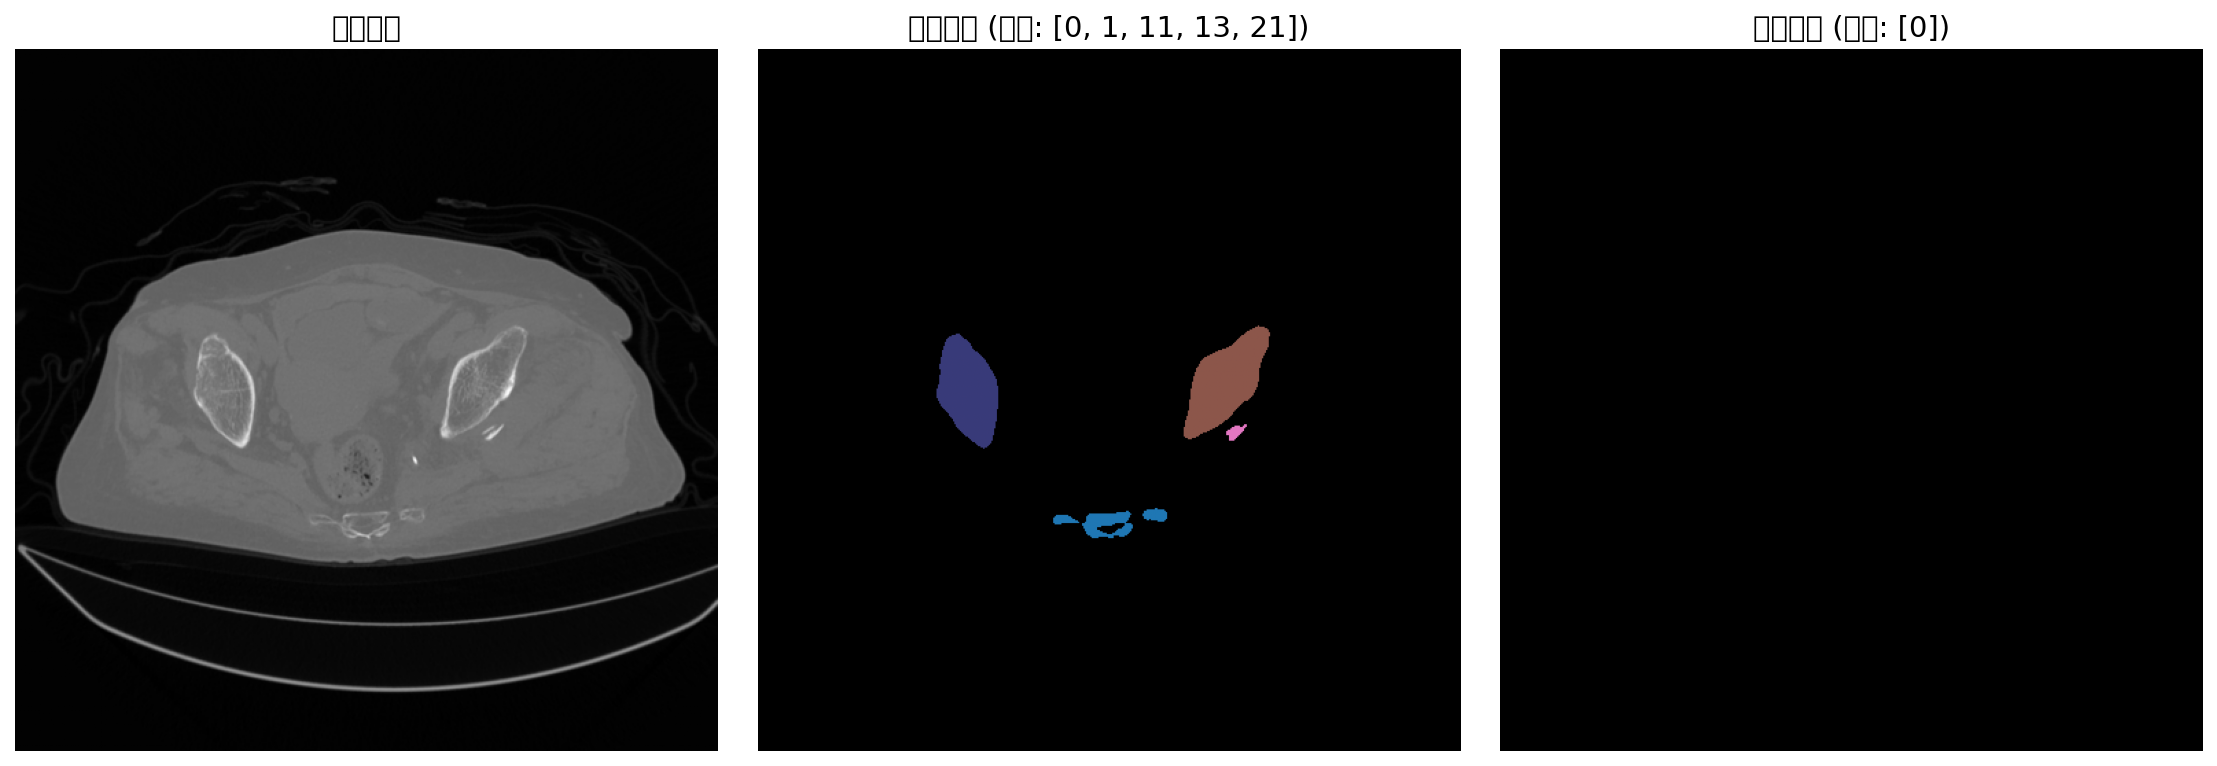

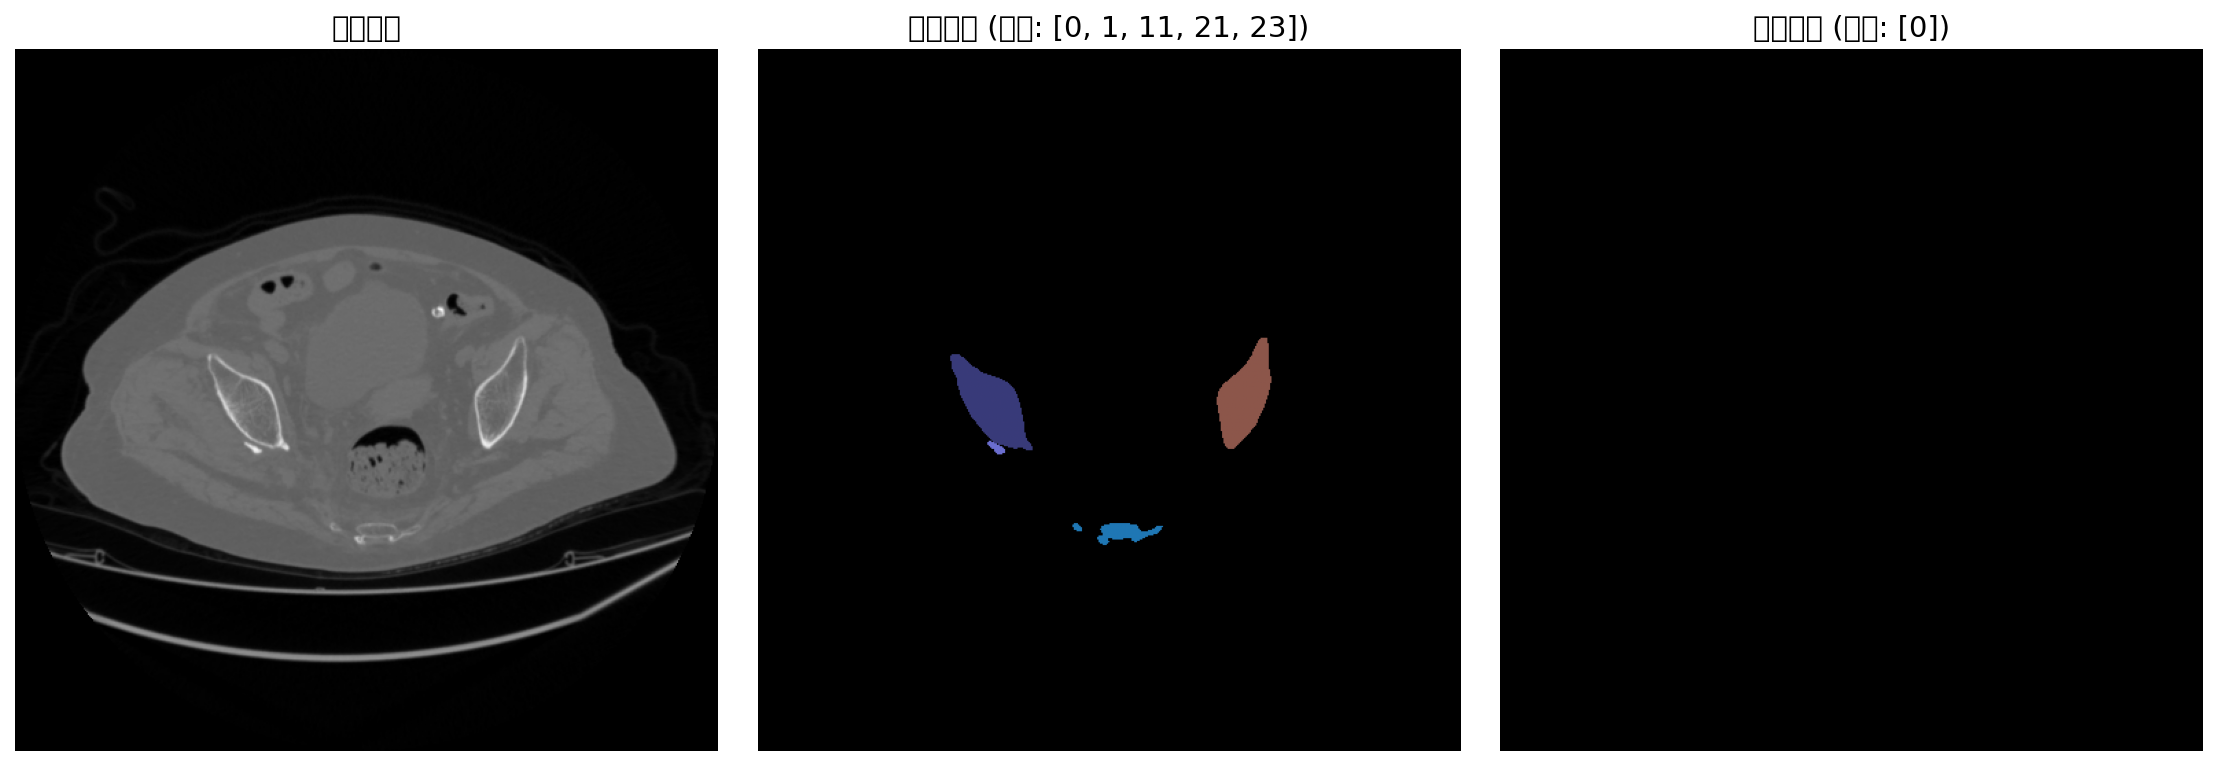

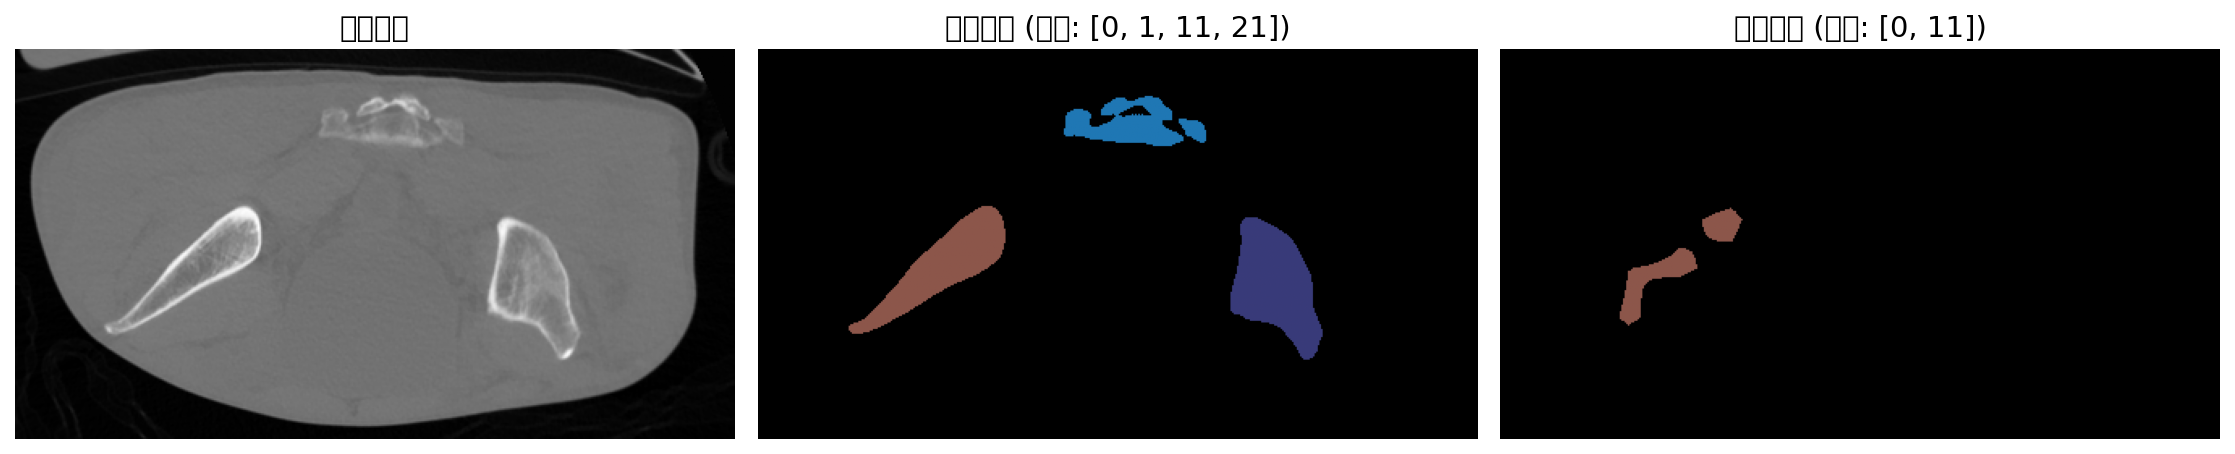

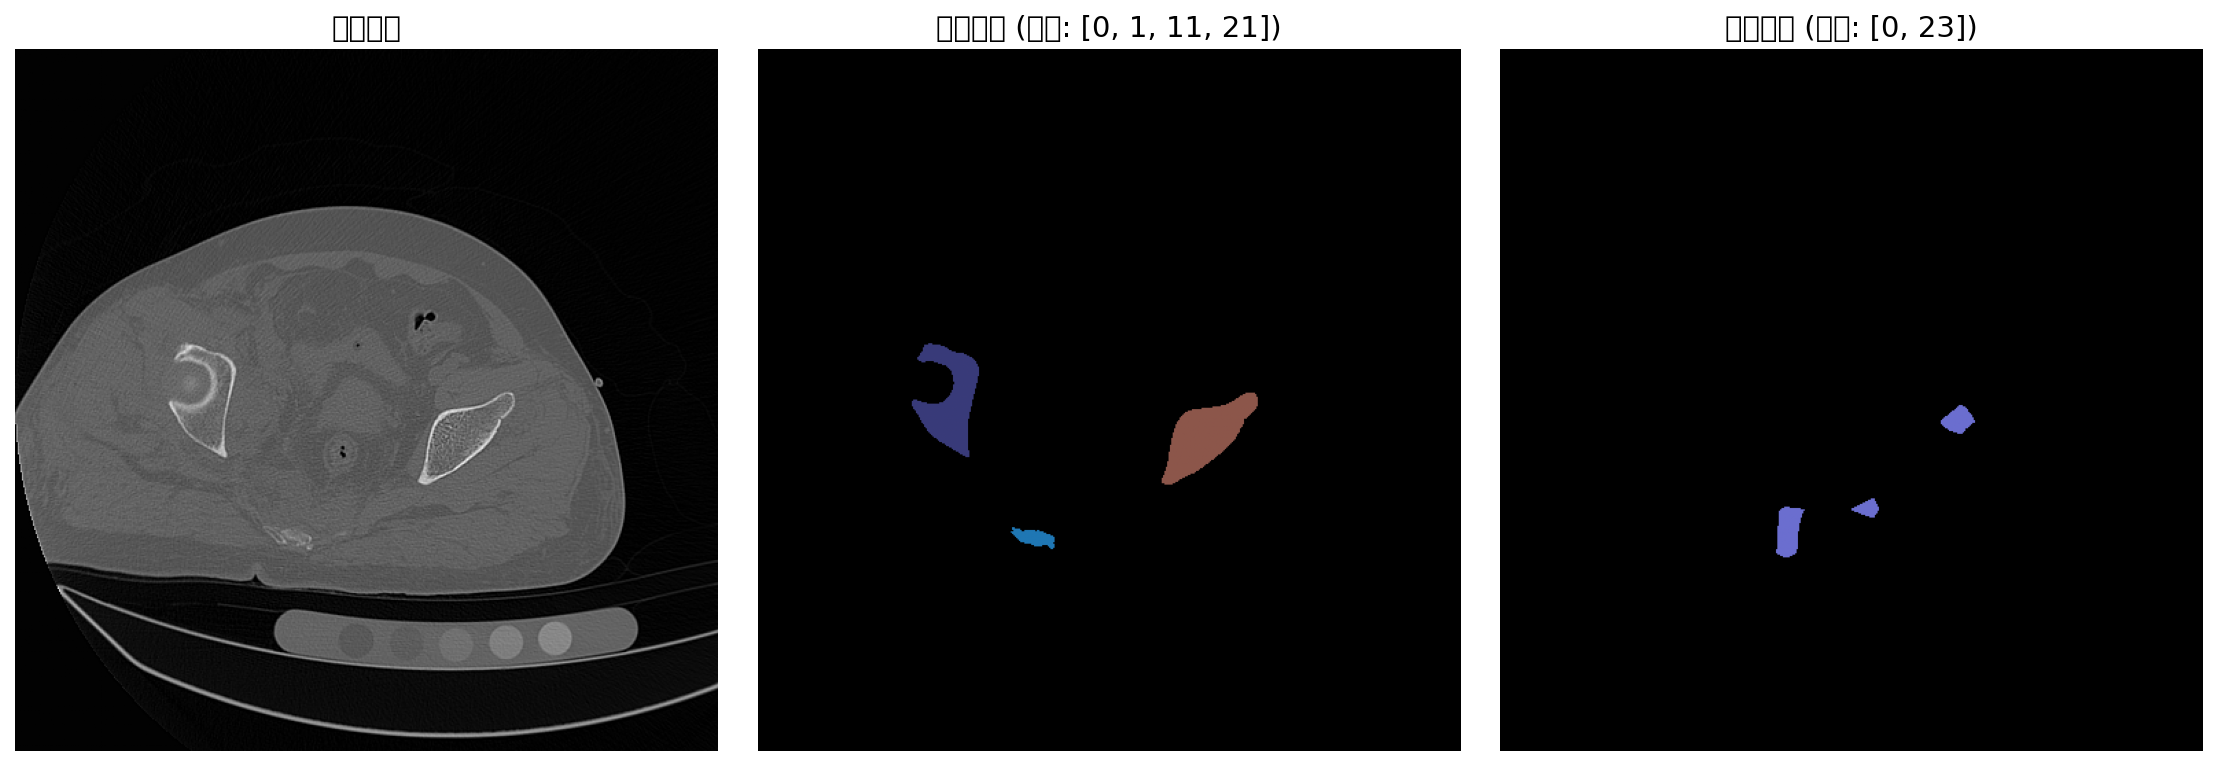

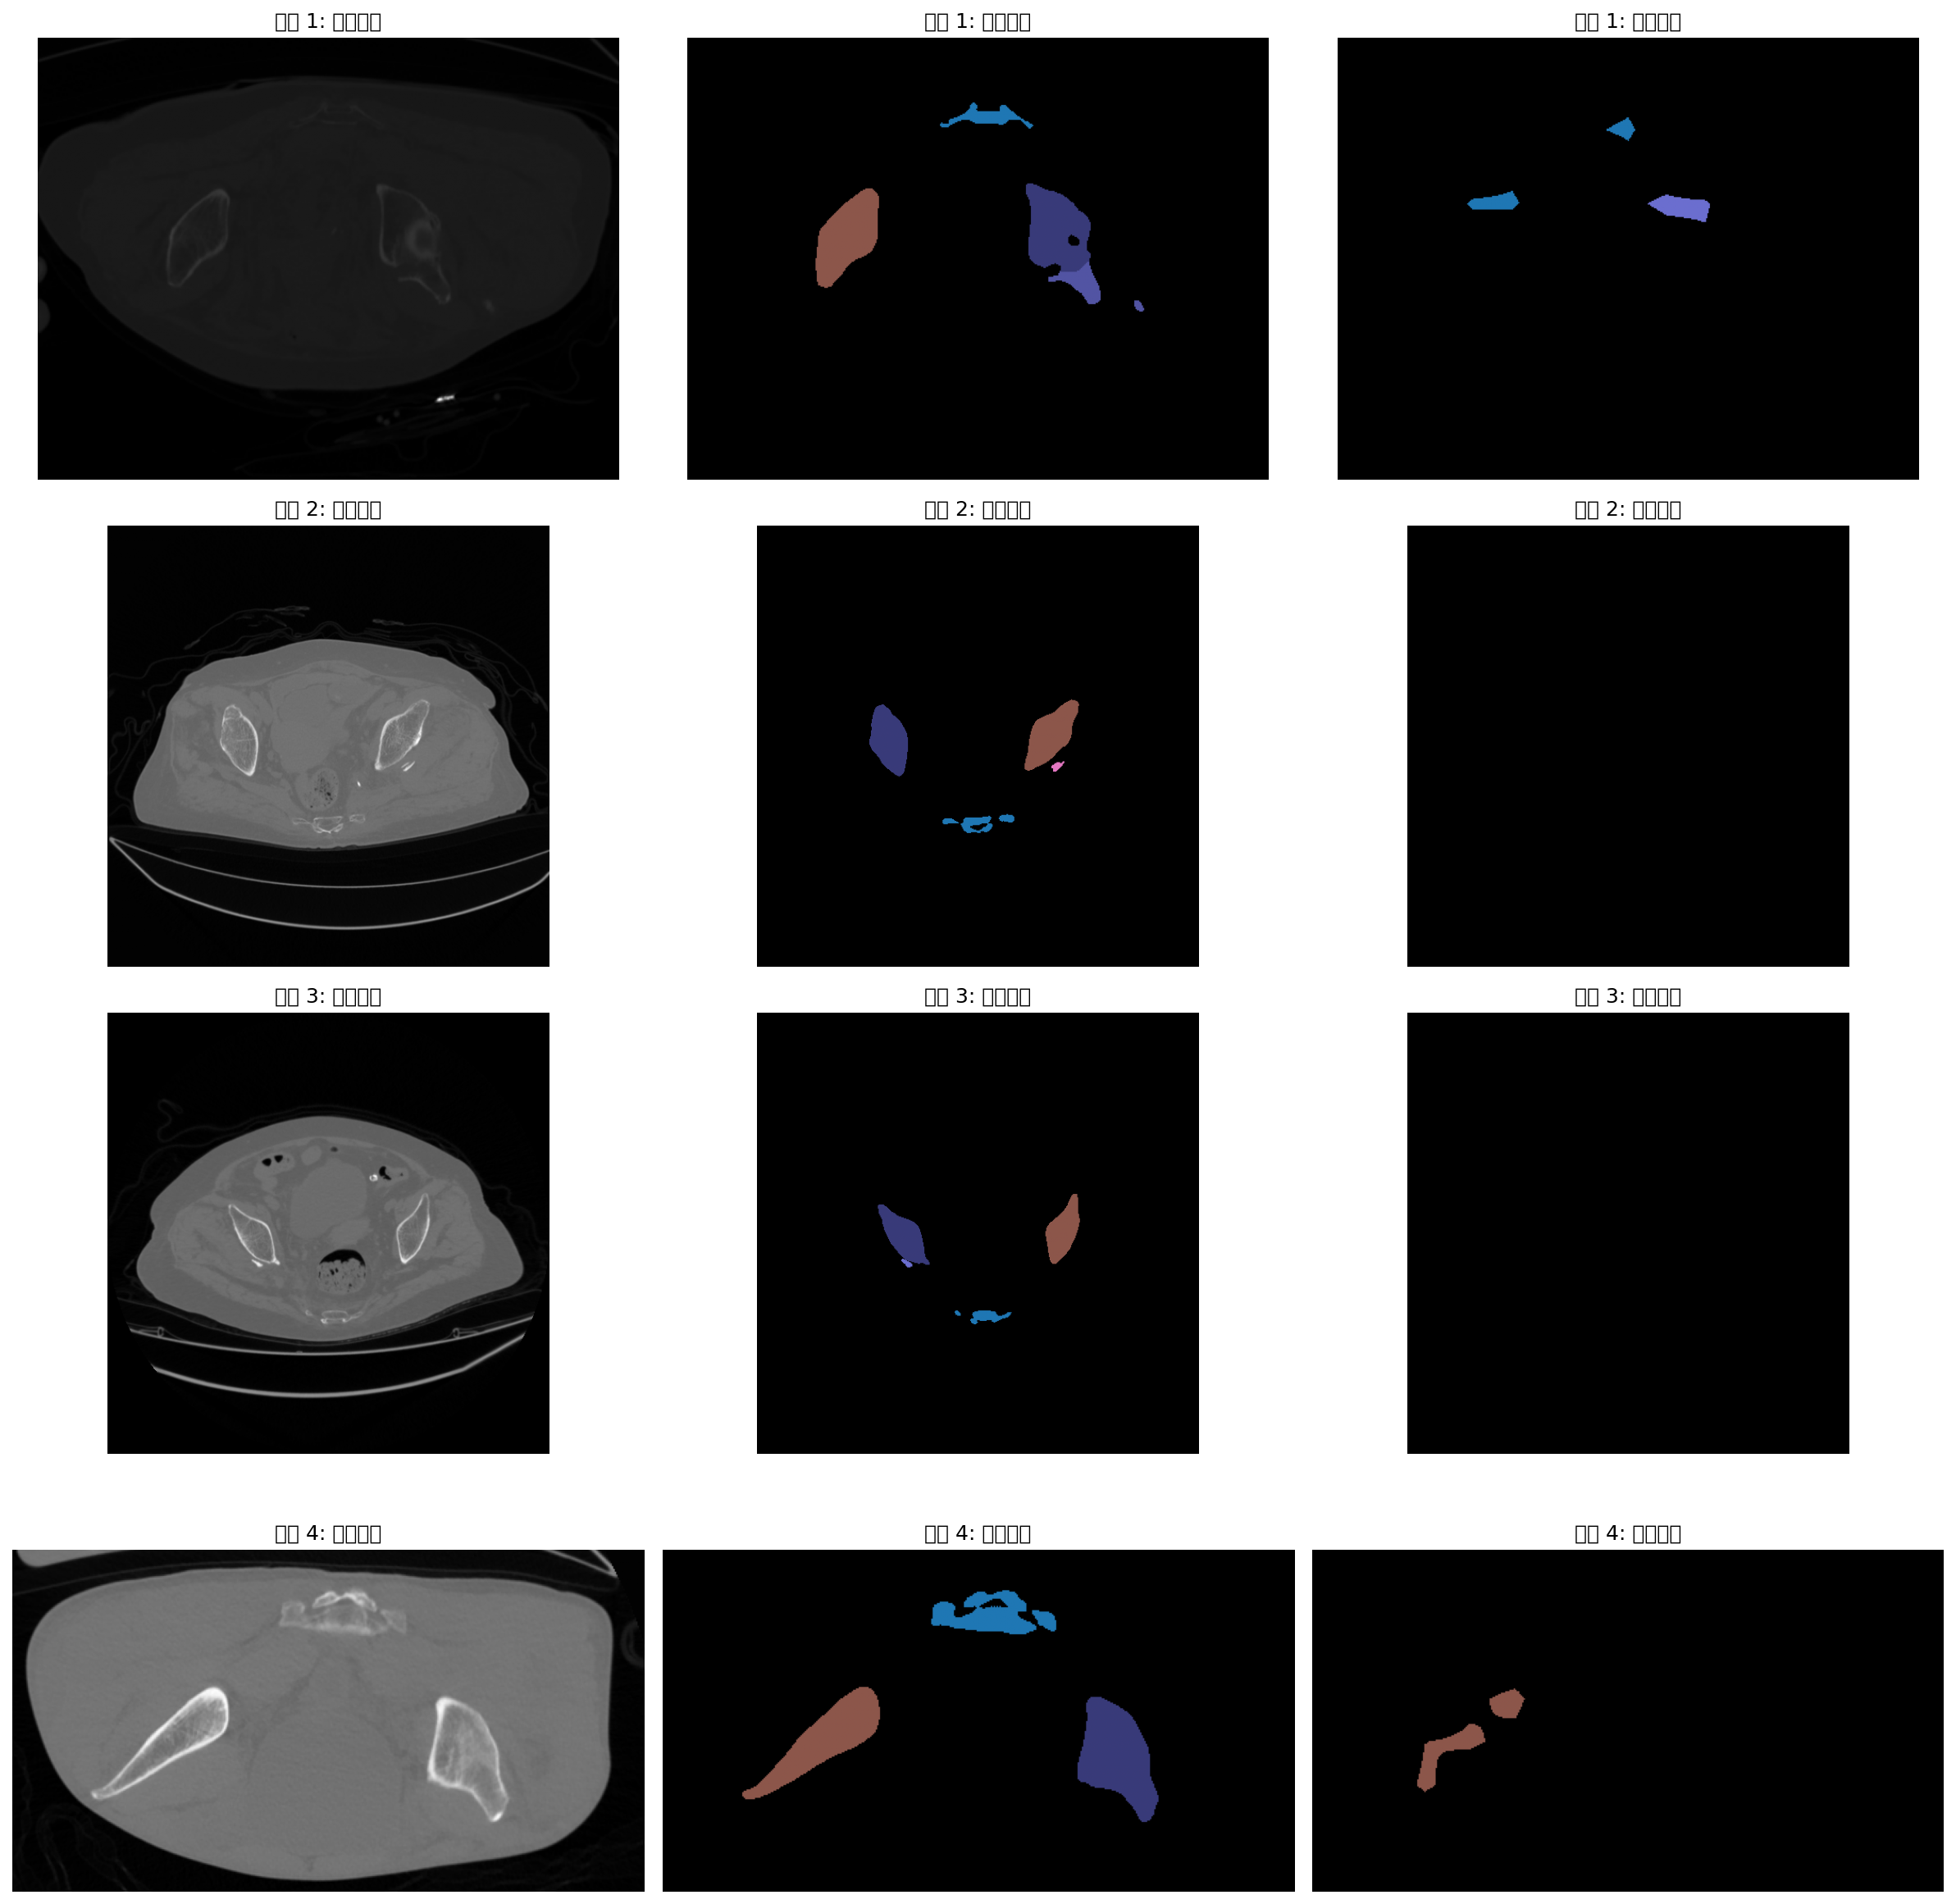


🔍 多轴向切片可视化:
多轴向文件不存在: /content/drive/MyDrive/ct_segmentation/DeeplabV3/evaluation/multiaxis_sample_2.png
多轴向文件不存在: /content/drive/MyDrive/ct_segmentation/DeeplabV3/evaluation/multiaxis_sample_3.png
多轴向文件不存在: /content/drive/MyDrive/ct_segmentation/DeeplabV3/evaluation/multiaxis_sample_4.png

评估目录中的文件:
  - sample_1_result.png
  - confusion_matrix.png
  - sample_2_result.png
  - evaluation_report.txt
  - class_performance.png
  - enhanced_sample_1_result.png
  - enhanced_sample_2_result.png
  - enhanced_sample_3_result.png
  - enhanced_sample_4_result.png
  - enhanced_sample_5_result.png
  - enhanced_sample_6_result.png
  - samples_grid.png


In [11]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch.nn as nn
import pytorch_lightning as pl
from IPython.display import Image, display, HTML
from google.colab import drive

# 首先，让我们定义模型结构(从deeplabV3.py)以便加载权重
# 简化版ResNet骨干网络
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # 如果输入输出维度不同，添加1x1卷积进行调整
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# 简化版DeepLabV3骨干网络
class SimpleBackbone(nn.Module):
    def __init__(self, in_channels=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, 64, 7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(3, stride=2, padding=1)

        # 创建4个残差层
        self.layer1 = self._make_layer(64, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)

    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        return x

# ASPP模块
class ASPP(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        # 不同膨胀率的空洞卷积
        self.conv1 = nn.Conv2d(in_channels, out_channels, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(in_channels, out_channels, 3, padding=6, dilation=6, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(in_channels, out_channels, 3, padding=12, dilation=12, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)

        self.conv4 = nn.Conv2d(in_channels, out_channels, 3, padding=18, dilation=18, bias=False)
        self.bn4 = nn.BatchNorm2d(out_channels)

        # 全局平均池化分支
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.conv5 = nn.Conv2d(in_channels, out_channels, 1, bias=False)
        self.bn5 = nn.BatchNorm2d(out_channels)

        # 输出卷积
        self.conv_out = nn.Conv2d(out_channels * 5, out_channels, 1, bias=False)
        self.bn_out = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        size = x.size()[2:]

        # 并行处理各分支
        conv1 = F.relu(self.bn1(self.conv1(x)))
        conv2 = F.relu(self.bn2(self.conv2(x)))
        conv3 = F.relu(self.bn3(self.conv3(x)))
        conv4 = F.relu(self.bn4(self.conv4(x)))

        # 全局池化分支
        pool = self.pool(x)
        pool = F.relu(self.bn5(self.conv5(pool)))
        pool = F.interpolate(pool, size=size, mode='bilinear', align_corners=False)

        # 合并所有分支
        out = torch.cat([conv1, conv2, conv3, conv4, pool], dim=1)
        out = F.relu(self.bn_out(self.conv_out(out)))

        return out

# SimpleDeepLabV3模型
class SimpleDeepLabV3(nn.Module):
    def __init__(self, in_channels=1, num_classes=24):
        super().__init__()
        self.backbone = SimpleBackbone(in_channels)
        self.aspp = ASPP(512, 256)

        # 简单解码器
        self.decoder = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, num_classes, 1)
        )

    def forward(self, x):
        size = x.size()[2:]

        # 提取特征
        features = self.backbone(x)

        # ASPP处理
        aspp_features = self.aspp(features)

        # 解码器处理
        logits = self.decoder(aspp_features)

        # 上采样回原始尺寸
        logits = F.interpolate(logits, size=size, mode='bilinear', align_corners=False)

        return logits

# 为了支持模型加载，定义一个嵌套类(模拟deeplabV3模块)
class DeeplabV3:
    class models:
        class DeepLabHead(nn.Module):
            def __init__(self, in_channels, num_classes):
                super().__init__()
                self.aspp = ASPP(in_channels, 256)
                self.decoder = nn.Sequential(
                    nn.Conv2d(256, 256, 3, padding=1, bias=False),
                    nn.BatchNorm2d(256),
                    nn.ReLU(inplace=True),
                    nn.Conv2d(256, num_classes, 1)
                )

            def forward(self, x):
                x = self.aspp(x)
                x = self.decoder(x)
                return x

# CT分割的自定义数据集
class CTSegmentationDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform

        # 获取所有.mha文件名
        self.image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.mha')])
        self.label_files = sorted([f for f in os.listdir(labels_dir) if f.endswith('.mha')])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # 读取MHA文件
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        label_path = os.path.join(self.labels_dir, self.label_files[idx])

        image = sitk.ReadImage(image_path)
        label = sitk.ReadImage(label_path)

        # 转换为NumPy数组
        image_array = sitk.GetArrayFromImage(image)
        label_array = sitk.GetArrayFromImage(label)

        # 对于3D数据，选择中间切片作为2D图像
        middle_slice = image_array.shape[0] // 2
        image_2d = image_array[middle_slice].astype(np.float32)
        label_2d = label_array[middle_slice].astype(np.int64)

        # 归一化图像：窗位调整后缩放到[0,1]
        image_2d = np.clip(image_2d, -1000, 1000)  # 窗宽设为2000，窗位设为0
        image_2d = (image_2d + 1000) / 2000.0

        # 添加通道维度
        image_2d = np.expand_dims(image_2d, axis=0)

        return torch.from_numpy(image_2d), torch.from_numpy(label_2d)

# 用于加载CT数据的函数
def load_ct_data(data_dir, max_samples=None):
    """加载CT数据集

    参数:
        data_dir: 数据目录路径
        max_samples: 最大样本数量

    返回:
        训练集，测试集，训练图像路径，测试图像路径
    """
    # 图像和标签路径
    images_dir = os.path.join(data_dir, "PENGWIN_CT_train_images")
    labels_dir = os.path.join(data_dir, "PENGWIN_CT_train_labels")

    # 检查目录是否存在
    if not os.path.exists(images_dir) or not os.path.exists(labels_dir):
        raise FileNotFoundError(f"未找到必要的数据目录: {images_dir} 或 {labels_dir}")

    # 获取所有.mha文件
    all_images = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.mha')])
    all_labels = sorted([os.path.join(labels_dir, f) for f in os.listdir(labels_dir) if f.endswith('.mha')])

    # 限制样本数量
    if max_samples:
        all_images = all_images[:max_samples]
        all_labels = all_labels[:max_samples]

    # 拆分为训练集和测试集 (80/20)
    split_idx = int(len(all_images) * 0.8)
    train_images = all_images[:split_idx]
    train_labels = all_labels[:split_idx]
    test_images = all_images[split_idx:]
    test_labels = all_labels[split_idx:]

    # 创建数据集
    train_dataset = CTSegmentationDataset(images_dir, labels_dir)
    test_dataset = CT3DDataset(test_images, test_labels)  # 使用新的3D数据集类

    return train_dataset, test_dataset, train_images, test_images

# 添加一个专门处理3D数据的数据集类
class CT3DDataset(Dataset):
    """CT 3D数据集 - 特别为多轴向可视化设计"""
    def __init__(self, image_files, mask_files):
        self.image_files = image_files
        self.mask_files = mask_files
        self.cached_volumes = {}  # 缓存加载过的体积

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        """返回CT体积的一个2D切片用于常规评估"""
        # 加载图像
        image_path = self.image_files[idx]
        ct_image = sitk.ReadImage(image_path)
        ct_array = sitk.GetArrayFromImage(ct_image)

        # 标准化
        ct_array = (ct_array - ct_array.min()) / (ct_array.max() - ct_array.min() + 1e-8)

        # 获取中间切片
        slice_idx = ct_array.shape[0] // 2
        ct_slice = ct_array[slice_idx]

        # 处理标签
        mask = None
        if self.mask_files:
            mask_path = self.mask_files[idx]
            mask_image = sitk.ReadImage(mask_path)
            mask_array = sitk.GetArrayFromImage(mask_image)
            mask_slice = mask_array[slice_idx]
            mask = torch.from_numpy(mask_slice).long()

        # 转为Tensor
        image = torch.from_numpy(ct_slice).float().unsqueeze(0)  # [1, H, W]

        # 缓存完整体积 (在第一次访问时)
        self.cached_volumes[idx] = {
            'volume': ct_array,
            'gt_volume': sitk.GetArrayFromImage(sitk.ReadImage(self.mask_files[idx])) if self.mask_files else None,
            'pred_volume': None  # 稍后会填充
        }

        return image, mask

    def get_volume_data(self, idx):
        """获取完整的3D体积数据"""
        if idx not in self.cached_volumes:
            # 如果尚未缓存，先加载
            _ = self[idx]
        return self.cached_volumes[idx]

    def save_prediction(self, idx, pred_volume):
        """保存预测体积结果"""
        if idx in self.cached_volumes:
            self.cached_volumes[idx]['pred_volume'] = pred_volume

def evaluate_model(model_path, data_dir, output_dir, num_classes=24, max_vis_samples=10):
    """评估模型性能并生成可视化结果

    参数:
        model_path: 模型权重路径
        data_dir: 数据目录
        output_dir: 输出目录
        num_classes: 类别数量
        max_vis_samples: 要可视化的最大样本数
    """
    # 1. 加载模型
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # 确保评估输出目录存在
    eval_dir = os.path.join(output_dir, 'evaluation')
    os.makedirs(eval_dir, exist_ok=True)

    try:
        print(f"加载模型: {model_path}")
        # 加载模型代码不变...

        model = CTSegmentationModule.load_from_checkpoint(model_path)
        model = model.to(device)
        model.eval()

        print(f"模型成功加载到设备: {device}")
    except Exception as e:
        print(f"模型加载失败: {e}")
        return None

    # 2. 准备验证数据
    train_dataset, test_dataset, train_images, test_images = load_ct_data(data_dir, max_samples=30)

    # 关键修改：使用 batch_size=1 避免尺寸不一致问题
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)

    print(f"测试数据集大小: {len(test_dataset)}样本")

    # 3. 计算评估指标
    print("开始评估...")

    metrics = {
        'dice_scores': 0.0,
        'iou_scores': 0.0,
        'precision': 0.0,
        'recall': 0.0,
        'accuracy': 0.0
    }

    # 用于存储每个类别的指标
    class_dice = {i: 0.0 for i in range(1, num_classes)}
    class_iou = {i: 0.0 for i in range(1, num_classes)}

    # 保存用于混淆矩阵的数据
    all_preds = []
    all_targets = []

    # 存储样本用于可视化
    vis_samples = []

    total_samples = 0
    with torch.no_grad():
        for batch_idx, (images, masks) in enumerate(tqdm(test_loader)):
            if isinstance(images, list):
                # 处理自定义collate_fn返回的格式
                batch_size = len(images)
                for i in range(batch_size):
                    img = images[i].to(device)
                    mask = masks[i].to(device) if masks[i] is not None else None

                    # 单样本预测
                    outputs = model(img.unsqueeze(0))
                    pred = outputs.argmax(1).squeeze(0).cpu().numpy()

                    # 保存这个样本的单切片结果
                    if mask is not None:
                        mask_np = mask.cpu().numpy()
                        all_targets.extend(mask_np.flatten())
                        all_preds.extend(pred.flatten())

                    # 收集可视化样本
                    if len(vis_samples) < max_vis_samples:
                        sample_idx = batch_idx * test_loader.batch_size + i
                        volume_data = test_dataset.get_volume_data(sample_idx)

                        # 获取完整的体积预测
                        full_volume = volume_data['volume']
                        volume_pred = np.zeros_like(full_volume)

                        # 为每个切片进行预测
                        for z in range(full_volume.shape[0]):
                            slice_tensor = torch.from_numpy(full_volume[z]).float().unsqueeze(0).unsqueeze(0).to(device)
                            slice_output = model(slice_tensor)
                            slice_pred = slice_output.argmax(1).squeeze(0).cpu().numpy()
                            volume_pred[z] = slice_pred

                        # 保存预测结果
                        test_dataset.save_prediction(sample_idx, volume_pred)

                        # 添加可视化样本
                        vis_samples.append({
                            'sample_idx': sample_idx,
                            'img': img.cpu().numpy()[0],  # 单个中心切片
                            'mask': mask_np if mask is not None else None,
                            'pred': pred,
                            'volume': full_volume,
                            'gt_volume': volume_data['gt_volume'],
                            'pred_volume': volume_pred
                        })
            else:
                # 处理常规批处理
                images = images.to(device)
                masks = masks.to(device) if masks is not None else None

                # 前向传播
                outputs = model(images)

                # 获取预测结果
                preds = torch.argmax(outputs, dim=1)

                # 保存样本用于可视化 (增加样本数量)
                for i in range(images.size(0)):
                    if len(vis_samples) < max_vis_samples:
                        vis_samples.append({
                            'image': images[i, 0].cpu().numpy(),
                            'target': masks[i].cpu().numpy(),
                            'pred': preds[i].cpu().numpy()
                        })

            # 计算批次的准确率
            acc = (preds == masks).float().mean().item()
            metrics['accuracy'] += acc * images.size(0)

            # 计算合并的分割指标
            for i in range(images.size(0)):
                pred = preds[i].cpu().numpy().flatten()
                target = masks[i].cpu().numpy().flatten()

                all_preds.extend(pred)
                all_targets.extend(target)

                # 二值化计算整体Dice/IoU
                pred_binary = (pred > 0).astype(np.float32)
                target_binary = (target > 0).astype(np.float32)

                intersection = np.sum(pred_binary * target_binary)
                dice = (2. * intersection) / (np.sum(pred_binary) + np.sum(target_binary) + 1e-8)
                iou = intersection / (np.sum(pred_binary) + np.sum(target_binary) - intersection + 1e-8)

                metrics['dice_scores'] += dice
                metrics['iou_scores'] += iou

                # 计算每个类别的Dice/IoU
                for cls in range(1, num_classes):
                    pred_cls = (pred == cls).astype(np.float32)
                    target_cls = (target == cls).astype(np.float32)

                    if np.sum(target_cls) > 0:  # 只计算存在的类别
                        intersection = np.sum(pred_cls * target_cls)
                        dice_cls = (2. * intersection) / (np.sum(pred_cls) + np.sum(target_cls) + 1e-8)
                        iou_cls = intersection / (np.sum(pred_cls) + np.sum(target_cls) - intersection + 1e-8)

                        class_dice[cls] += dice_cls
                        class_iou[cls] += iou_cls

            # 计算精确率和召回率
            pred_positive = (preds > 0).float()
            target_positive = (masks > 0).float()

            true_positive = (pred_positive * target_positive).sum().item()
            pred_sum = pred_positive.sum().item() + 1e-8
            target_sum = target_positive.sum().item() + 1e-8

            precision = true_positive / pred_sum
            recall = true_positive / target_sum

            metrics['precision'] += precision * images.size(0)
            metrics['recall'] += recall * images.size(0)

            total_samples += images.size(0)

    # 计算平均值
    metrics['accuracy'] /= total_samples
    metrics['dice_scores'] /= total_samples
    metrics['iou_scores'] /= total_samples
    metrics['precision'] /= total_samples
    metrics['recall'] /= total_samples

    # 找出有效的类别（实际出现在测试集中的类别）
    valid_classes = []
    for cls in range(1, num_classes):
        if class_dice[cls] > 0:
            class_dice[cls] /= total_samples
            class_iou[cls] /= total_samples
            valid_classes.append(cls)

    # 4. 输出评估结果
    print(f"\n模型评估结果 - {model_path}")
    print(f"准确率: {metrics['accuracy']:.4f}")
    print(f"平均Dice系数: {metrics['dice_scores']:.4f}")
    print(f"平均IoU: {metrics['iou_scores']:.4f}")
    print(f"精确率: {metrics['precision']:.4f}")
    print(f"召回率: {metrics['recall']:.4f}")

    print("\n各类别性能:")
    for cls in sorted(valid_classes):
        print(f"类别 {cls}: Dice={class_dice[cls]:.4f}, IoU={class_iou[cls]:.4f}")

    # 5. 创建可视化
    # 创建保存可视化的目录
    os.makedirs(os.path.join(output_dir, 'evaluation'), exist_ok=True)

    # 自定义更鲜明的颜色映射 (确保类别更容易区分)
    from matplotlib.colors import LinearSegmentedColormap

    # 创建自定义的颜色列表 (增加对比度)
    colors = plt.cm.tab20(np.linspace(0, 1, 20))
    if len(colors) < num_classes:
        # 添加更多颜色
        colors_extra = plt.cm.tab20b(np.linspace(0, 1, 20))
        colors = np.vstack([colors, colors_extra])

    # 将背景(0)设为黑色
    custom_colors = [(0, 0, 0, 1)]  # 黑色，完全不透明
    for i in range(1, num_classes):
        if i-1 < len(colors):
            custom_colors.append(tuple(colors[i-1]))
        else:
            # 随机生成颜色
            custom_colors.append((np.random.rand(), np.random.rand(), np.random.rand(), 1))

    custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', custom_colors, N=num_classes)

    # 6. 为每个样本生成增强可视化
    print("\n生成增强版可视化结果...")
    for i, sample in enumerate(vis_samples):
        try:
            # 创建三联图 (输入、真值标注、预测结果)
            plt.figure(figsize=(15, 5))

            # 输入图像
            plt.subplot(1, 3, 1)
            plt.imshow(sample['image'], cmap='gray')
            plt.title("输入图像", fontsize=14)
            plt.axis('off')

            # 真值标注 (使用增强的颜色映射)
            plt.subplot(1, 3, 2)
            plt.imshow(sample['target'], cmap=custom_cmap, vmin=0, vmax=num_classes-1)
            unique_classes = np.unique(sample['target'])
            plt.title(f"真值标注 (类别: {sorted(unique_classes.tolist())})", fontsize=14)
            plt.axis('off')

            # 预测结果 (使用相同的颜色映射)
            plt.subplot(1, 3, 3)
            plt.imshow(sample['pred'], cmap=custom_cmap, vmin=0, vmax=num_classes-1)
            unique_preds = np.unique(sample['pred'])
            plt.title(f"模型预测 (类别: {sorted(unique_preds.tolist())})", fontsize=14)
            plt.axis('off')

            # 保存高质量图像
            plt.tight_layout()
            plt.savefig(os.path.join(eval_dir, f'enhanced_sample_{i+1}_result.png'),
                        dpi=150, bbox_inches='tight')
            plt.close()
        except Exception as e:
            print(f"生成样本 {i+1} 的可视化时出错: {e}")

    # 7. 绘制每个类别的性能图表
    plt.figure(figsize=(12, 6))

    # 转换为列表以便绘图
    valid_classes = sorted(valid_classes)
    dice_scores = [class_dice[cls] for cls in valid_classes]
    iou_scores = [class_iou[cls] for cls in valid_classes]

    # 分别绘制Dice和IoU
    plt.subplot(1, 2, 1)
    plt.bar(range(len(valid_classes)), dice_scores, color='skyblue')
    plt.xlabel('类别ID')
    plt.ylabel('Dice系数')
    plt.title('各类别Dice系数')
    plt.xticks(range(len(valid_classes)), valid_classes)

    plt.subplot(1, 2, 2)
    plt.bar(range(len(valid_classes)), iou_scores, color='salmon')
    plt.xlabel('类别ID')
    plt.ylabel('IoU')
    plt.title('各类别IoU')
    plt.xticks(range(len(valid_classes)), valid_classes)

    plt.tight_layout()
    plt.savefig(os.path.join(eval_dir, 'class_performance.png'))
    plt.close()

    # 8. 生成混淆矩阵 (限制类别数避免太大)
    max_classes = min(10, num_classes)
    # 截断类别
    all_preds = [min(p, max_classes-1) for p in all_preds[:1000]]
    all_targets = [min(t, max_classes-1) for t in all_targets[:1000]]

    cm = confusion_matrix(all_targets, all_preds, labels=range(max_classes))

    # 将混淆矩阵标准化为百分比
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=range(max_classes), yticklabels=range(max_classes))
    plt.xlabel('预测标签')
    plt.ylabel('真实标签')
    plt.title('混淆矩阵')
    plt.tight_layout()
    plt.savefig(os.path.join(eval_dir, 'confusion_matrix.png'))
    plt.close()

    # 9. 创建组合视图 (多个样本的网格)
    if len(vis_samples) >= 4:
        grid_size = min(4, len(vis_samples))  # 最多展示4个样本
        plt.figure(figsize=(16, 4*grid_size))

        for i in range(grid_size):
            # 原始图像
            plt.subplot(grid_size, 3, i*3+1)
            plt.imshow(vis_samples[i]['image'], cmap='gray')
            plt.title(f'样本 {i+1}: 输入图像')
            plt.axis('off')

            # 真实标签
            plt.subplot(grid_size, 3, i*3+2)
            plt.imshow(vis_samples[i]['target'], cmap=custom_cmap, vmin=0, vmax=num_classes-1)
            plt.title(f'样本 {i+1}: 标注真值')
            plt.axis('off')

            # 预测结果
            plt.subplot(grid_size, 3, i*3+3)
            plt.imshow(vis_samples[i]['pred'], cmap=custom_cmap, vmin=0, vmax=num_classes-1)
            plt.title(f'样本 {i+1}: 模型预测')
            plt.axis('off')

        plt.tight_layout()
        plt.savefig(os.path.join(eval_dir, 'samples_grid.png'), dpi=150, bbox_inches='tight')
        plt.close()

    # 10. 保存详细评估报告
    with open(os.path.join(eval_dir, 'evaluation_report.txt'), 'w') as f:
        f.write("=== CT分割模型评估报告 ===\n\n")
        f.write(f"模型路径: {model_path}\n")
        f.write(f"类别数量: {num_classes}\n\n")

        f.write("整体性能指标:\n")
        f.write(f"准确率: {metrics['accuracy']:.4f}\n")
        f.write(f"Dice系数: {metrics['dice_scores']:.4f}\n")
        f.write(f"IoU: {metrics['iou_scores']:.4f}\n")
        f.write(f"精确率: {metrics['precision']:.4f}\n")
        f.write(f"召回率: {metrics['recall']:.4f}\n\n")

        f.write("各类别性能:\n")
        for cls in sorted(class_dice.keys()):
            if cls in valid_classes:
                f.write(f"类别 {cls}: Dice={class_dice[cls]:.4f}, IoU={class_iou[cls]:.4f}\n")

    print(f"评估完成! 报告已保存到 {os.path.join(output_dir, 'evaluation')}")

    # 在评估结束后添加详细的调试信息
    print("\n===== 创建多轴向可视化 =====")
    print(f"可视化样本数量: {len(vis_samples)}")

    # 检查vis_samples列表中是否有内容
    if len(vis_samples) == 0:
        print("警告: 没有收集到可视化样本!")

    # 强制创建至少一个多轴向视图，使用第一个样本（如果存在）
    try:
        # 获取第一个样本的原始mha文件 - 直接从文件中读取
        test_images = sorted([os.path.join(data_dir, "PENGWIN_CT_train_images", f) for f in os.listdir(os.path.join(data_dir, "PENGWIN_CT_train_images")) if f.endswith('.mha')])
        test_labels = sorted([os.path.join(data_dir, "PENGWIN_CT_train_labels", f) for f in os.listdir(os.path.join(data_dir, "PENGWIN_CT_train_labels")) if f.endswith('.mha')])

        if len(test_images) > 0 and len(test_labels) > 0:
            print(f"尝试从文件加载3D体积: {test_images[0]}")

            # 读取3D体积和标签
            ct_image = sitk.ReadImage(test_images[0])
            ct_volume = sitk.GetArrayFromImage(ct_image)

            gt_image = sitk.ReadImage(test_labels[0])
            gt_volume = sitk.GetArrayFromImage(gt_image)

            # 创建预测体积 - 对整个体积进行预测
            print("对3D体积进行预测...")
            model.eval()
            pred_volume = np.zeros_like(gt_volume)

            with torch.no_grad():
                for z in range(ct_volume.shape[0]):
                    # 获取并预处理切片
                    ct_slice = ct_volume[z]
                    ct_slice = (ct_slice - ct_slice.min()) / (ct_slice.max() - ct_slice.min() + 1e-8)

                    # 转换为张量
                    slice_tensor = torch.from_numpy(ct_slice).float().unsqueeze(0).unsqueeze(0)
                    slice_tensor = slice_tensor.to(device)

                    # 预测
                    try:
                        output = model(slice_tensor)
                        pred_slice = output.argmax(1).squeeze().cpu().numpy()
                        pred_volume[z] = pred_slice
                    except Exception as e:
                        print(f"切片 {z} 预测失败: {e}")
                        continue

            # 保存多轴向可视化
            multiaxis_path = os.path.join(eval_dir, 'multiaxis_sample_1.png')
            print(f"创建多轴向可视化: {multiaxis_path}")
            create_multiaxis_visualization(ct_volume, gt_volume, pred_volume, multiaxis_path, 1)

            # 再创建几个不同深度的切片
            for i in range(1, 4):
                z_pos = ct_volume.shape[0] // 5 * i
                multiaxis_path = os.path.join(eval_dir, f'multiaxis_sample_{i+1}.png')

                # 修改create_multiaxis_visualization函数调用，传入特定切片位置
                create_multiaxis_visualization_at_position(
                    ct_volume, gt_volume, pred_volume,
                    multiaxis_path, i+1,
                    z_pos=z_pos, y_pos=ct_volume.shape[1]//2, x_pos=ct_volume.shape[2]//2
                )
        else:
            print("没有找到可用的测试图像!")

    except Exception as e:
        print(f"创建多轴向可视化时出错: {e}")
        import traceback
        traceback.print_exc()

    return metrics

# 添加新函数，允许指定切片位置
def create_multiaxis_visualization_at_position(ct_volume, gt_volume, pred_volume, output_path, patient_id,
                                             z_pos=None, y_pos=None, x_pos=None):
    """创建指定位置的多轴向可视化"""
    print(f"为患者 {patient_id} 创建指定位置的多轴向可视化...")

    # 使用指定位置，如果没有指定则使用中心位置
    z, y, x = ct_volume.shape
    z_mid = z_pos if z_pos is not None else z // 2
    y_mid = y_pos if y_pos is not None else y // 2
    x_mid = x_pos if x_pos is not None else x // 2

    print(f"体积大小: {ct_volume.shape}, 切片位置: z={z_mid}, y={y_mid}, x={x_mid}")

    # 创建三种切片视图
    axial_slice = {
        'img': ct_volume[z_mid, :, :],
        'gt': gt_volume[z_mid, :, :] if gt_volume is not None else None,
        'pred': pred_volume[z_mid, :, :] if pred_volume is not None else None,
        'title': f'轴状切片(Axial) z={z_mid}'
    }

    coronal_slice = {
        'img': ct_volume[:, y_mid, :],
        'gt': gt_volume[:, y_mid, :] if gt_volume is not None else None,
        'pred': pred_volume[:, y_mid, :] if pred_volume is not None else None,
        'title': f'冠状切片(Coronal) y={y_mid}'
    }

    sagittal_slice = {
        'img': ct_volume[:, :, x_mid],
        'gt': gt_volume[:, :, x_mid] if gt_volume is not None else None,
        'pred': pred_volume[:, :, x_mid] if pred_volume is not None else None,
        'title': f'矢状切片(Sagittal) x={x_mid}'
    }

    slices = [axial_slice, coronal_slice, sagittal_slice]

    # 创建多轴向图像
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    # 使用相同的自定义colormap
    cmap = plt.cm.get_cmap('viridis', 24)  # 使用固定的24类
    custom_cmap = plt.cm.colors.ListedColormap(['black'] + [cmap(i) for i in range(1, 24)])

    for i, slice_data in enumerate(slices):
        # 提取该方向上的唯一类别
        gt_classes = np.unique(slice_data['gt']) if slice_data['gt'] is not None else []
        pred_classes = np.unique(slice_data['pred']) if slice_data['pred'] is not None else []

        # 输入图像
        axes[i, 0].imshow(slice_data['img'], cmap='gray')
        axes[i, 0].set_title(f"{slice_data['title']}: 输入图像", fontsize=12)
        axes[i, 0].axis('off')

        # 真实标签
        if slice_data['gt'] is not None:
            axes[i, 1].imshow(slice_data['gt'], cmap=custom_cmap, vmin=0, vmax=23)
            class_str = ", ".join([str(c) for c in gt_classes if c > 0])
            axes[i, 1].set_title(f"{slice_data['title']}: 标注真值 (类别: {class_str})", fontsize=12)
        else:
            axes[i, 1].imshow(np.zeros_like(slice_data['img']), cmap='gray')
            axes[i, 1].set_title(f"{slice_data['title']}: 无标注真值", fontsize=12)
        axes[i, 1].axis('off')

        # 预测结果
        if slice_data['pred'] is not None:
            axes[i, 2].imshow(slice_data['pred'], cmap=custom_cmap, vmin=0, vmax=23)
            class_str = ", ".join([str(c) for c in pred_classes if c > 0])
            axes[i, 2].set_title(f"{slice_data['title']}: 模型预测 (类别: {class_str})", fontsize=12)
        else:
            axes[i, 2].imshow(np.zeros_like(slice_data['img']), cmap='gray')
            axes[i, 2].set_title(f"{slice_data['title']}: 无预测结果", fontsize=12)
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig(output_path, dpi=200, bbox_inches='tight')
    plt.close()

    print(f"多轴向可视化已保存到 {output_path}")

# 使用方法
if __name__ == "__main__":
    # 指定确切的模型路径
    model_path = "/content/drive/MyDrive/ct_segmentation/DeeplabV3/last-v1.ckpt"

    # 检查模型文件是否存在
    print(f"检查模型文件是否存在: {os.path.exists(model_path)}")
    if not os.path.exists(model_path):
        # 尝试使用用户提供的路径
        alt_path = "/content/drive/MyDrive/ct_segemetation/DeeplabV3/last-v1.ckpt"
        print(f"尝试替代路径: {alt_path}")
        print(f"替代路径存在: {os.path.exists(alt_path)}")
        if os.path.exists(alt_path):
            model_path = alt_path
        else:
            print("模型文件未找到，请确认路径正确")
            # 列出可能的路径
            possible_paths = [
                "/content/drive/MyDrive/ct_segmentation/DeeplabV3/last-v1.ckpt",
                "/content/drive/MyDrive/ct_segemetation/DeeplabV3/last-v1.ckpt",
                "/content/MyDrive/ct_segemetation/DeeplabV3/last-v1.ckpt",
                "/content/MyDrive/ct_segmentation/DeeplabV3/last-v1.ckpt"
            ]
            for path in possible_paths:
                if os.path.exists(path):
                    print(f"找到模型文件: {path}")
                    model_path = path
                    break

    # 数据和输出目录 - 使用与deeplabV3.py相同的路径
    data_dir = '/content/drive/MyDrive/ct_segmentation/data'  # 从deeplabV3.py获取的路径
    output_dir = '/content/drive/MyDrive/ct_segmentation/DeeplabV3'  # 从deeplabV3.py获取的路径

    # 确保目录存在
    os.makedirs(data_dir, exist_ok=True)
    os.makedirs(output_dir, exist_ok=True)

    # 检查数据目录
    print("\n检查数据目录:")
    images_dir = os.path.join(data_dir, "PENGWIN_CT_train_images")
    labels_dir = os.path.join(data_dir, "PENGWIN_CT_train_labels")

    print(f"图像目录: {images_dir}")
    print(f"  - 存在: {os.path.exists(images_dir)}")
    if os.path.exists(images_dir):
        print(f"  - 找到 {len([f for f in os.listdir(images_dir) if f.endswith('.mha')])} 个.mha文件")

    print(f"标签目录: {labels_dir}")
    print(f"  - 存在: {os.path.exists(labels_dir)}")
    if os.path.exists(labels_dir):
        print(f"  - 找到 {len([f for f in os.listdir(labels_dir) if f.endswith('.mha')])} 个.mha文件")

    # 执行评估
    evaluate_model(model_path, data_dir, output_dir, num_classes=24, max_vis_samples=10)

# 显示评估结果
print("\n===== 展示评估结果 =====")
eval_dir = os.path.join('/content/drive/MyDrive/ct_segmentation/DeeplabV3', 'evaluation')

try:
    # 显示增强版本的分割可视化
    print("\n🔍 增强版样本分割结果:")
    for i in range(1, 6):  # 展示前5个增强样本
        sample_file = os.path.join(eval_dir, f'enhanced_sample_{i}_result.png')
        if os.path.exists(sample_file):
            from IPython.display import Image, display, HTML
            display(HTML(f"<h3>增强样本 {i}</h3>"))
            display(Image(filename=sample_file))

    # 显示样本网格
    grid_file = os.path.join(eval_dir, 'samples_grid.png')
    if os.path.exists(grid_file):
        from IPython.display import Image, display, HTML
        display(HTML("<h3>多样本比较网格</h3>"))
        display(Image(filename=grid_file))

    # 显示多轴向可视化
    print("\n🔍 多轴向切片可视化:")
    for i in range(1, 4):  # 展示前3个样本的多轴向视图
        multiaxis_file = os.path.join(eval_dir, f'multiaxis_sample_{i+1}.png')
        if os.path.exists(multiaxis_file):
            from IPython.display import Image, display, HTML
            display(HTML(f"<h3>样本 {i} 的多轴向视图</h3>"))
            display(Image(filename=multiaxis_file))
        else:
            print(f"多轴向文件不存在: {multiaxis_file}")

    # 列出评估目录中的所有文件
    print("\n评估目录中的文件:")
    if os.path.exists(eval_dir):
        for f in os.listdir(eval_dir):
            print(f"  - {f}")

except ImportError:
    print("无法使用IPython显示，请直接查看保存的图像文件")